## Morphological counts

 Q2: clinical data vs. morphology
1) Compute systematically associations between clinical variables and morphological cluster counts. The purpose is to compare the magnitude of the associations of the different variables with morphology.
2) Discuss the association with technical variables.
3) For non-technical variables, redo the analysis with adjustment for the confounding technical variables, if any is reported in Q2.2. Report and discuss significant associations.

In [ ]:
#Installs and imports
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DESeq2")
install.packages("corrplot")

In [2]:
library("DESeq2")
library(ggplot2)
library(corrplot)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading required p

In [17]:
#load data
clinical_data = read.delim(file='clinical-data.tsv',sep ='\t',header=TRUE,row.names=1)
#DTHHRDY is a categorical variable, set its type to character to that it can be viewed as such by deseq2
clinical_data$DTHHRDY <- as.factor(clinical_data$DTHHRDY)
clinical_data$COHORT <- as.factor(substr(clinical_data$COHORT,1,1))
#We normalize the numerical variables
clinical_data$AGE <- scale(clinical_data$AGE)
clinical_data$HGHT <- scale(clinical_data$HGHT)
clinical_data$WGHT <- scale(clinical_data$WGHT)
clinical_data$BMI <- scale(clinical_data$BMI)
clinical_data$TRISCHD <- scale(clinical_data$TRISCHD)
head(clinical_data)


,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,COHORT,TRISCHD,DTHHRDY,SUBJID,IMGURL
,<int>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<chr>,<fct>,"<dbl[,1]>",<fct>,<chr>,<chr>
GTEX-1122O-0226,2,0.86772570,0.64160652,1.49574031,1.3791798,"2 pieces, some nodular change",O,-1.0406059,0,GTEX.1122O,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-0226
GTEX-1128S-0126,2,1.02733328,0.64160652,-0.00743612,-0.2927816,"2 pieces, no abnormalities noted",P,0.8214603,2,GTEX.1128S,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0126
GTEX-113JC-0126,2,-0.01011597,1.01578428,0.62879204,0.2300075,2 pieces,P,0.3326977,2,GTEX.113JC,https://brd.nci.nih.gov/brd/specimen/GTEX-113JC-0126
GTEX-11DXX-0226,2,1.02733328,0.01797693,-1.12607905,-1.3022222,"2 pieces, some fibrosis",O,-0.9905375,0,GTEX.11DXX,https://brd.nci.nih.gov/brd/specimen/GTEX-11DXX-0226
GTEX-11EM3-0126,2,-2.56383722,-2.26866492,-1.75531569,-1.1624906,"2 pieces, small attachment of fibrofatty tissue",O,-1.0811374,0,GTEX.11EM3,https://brd.nci.nih.gov/brd/specimen/GTEX-11EM3-0126
GTEX-11EMC-0226,2,1.02733328,-1.02140573,-1.75531569,-1.6660063,"2 pieces, no significant findings",P,0.4638291,2,GTEX.11EMC,https://brd.nci.nih.gov/brd/specimen/GTEX-11EMC-0226


In [1]:
morph_counts = t(read.delim(file='morphological-counts.tsv', sep='\t', header=TRUE, row.names=1))
#Take out "Morphological.cluster" from column names for brevity's sake
row.names(morph_counts) = gsub("Mophological.cluster.", "", row.names(morph_counts))
head(morph_counts)

,GTEX-1122O-0226,GTEX-1128S-0126,GTEX-113JC-0126,GTEX-11DXX-0226,GTEX-11EM3-0126,GTEX-11EMC-0226,GTEX-11GSP-0126,GTEX-11I78-0526,GTEX-11P81-0126,GTEX-11TTK-0826,⋯,GTEX-1PBJI-0726,GTEX-1QCLZ-0626,GTEX-1QEPI-0726,GTEX-1QP28-0626,GTEX-1QP67-0326,GTEX-1QPFJ-0626,GTEX-1R46S-0426,GTEX-1R9JW-0226,GTEX-1RDX4-0926,GTEX-1S5ZU-0726
0,171,198,175,79,20,24,60,49,86,211,⋯,90,24,57,17,242,10,240,28,304,134
1,133,60,95,52,22,35,680,23,189,277,⋯,194,13,35,89,172,26,71,35,221,203
2,105,131,73,144,107,161,369,113,40,87,⋯,177,126,166,135,15,54,101,186,235,11
3,235,345,160,20,74,50,0,92,52,261,⋯,262,16,44,41,126,18,279,3,412,251
4,13,261,48,30,49,233,10,23,10,84,⋯,449,51,260,68,11,19,81,33,131,7
5,399,332,163,177,589,84,9,178,53,27,⋯,31,197,23,238,106,313,501,114,196,8


Automatically generates interesting plots in function of var. All plots are saved under morph_plots/ and file names end in the variable name. In case of a categorical variable, there are some extra plots that can begenerated lile plotCounts and volcano plot. These are not interesting for the other variables because they are typically made in a "cancer/no cancer" type situation, this can be an interesting style of analysis for e.g. postmortem/donor, but not for weight or height.

In [18]:
morph_analysis <- function(var, formula, categorical, confounding=FALSE) {
  
  #construct DESEQDataset object
  #we don't normalize the counts since the tutorial from bioconductor
  #says deseq2 does not expect that: 
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#why-un-normalized-counts
  
  #dds holds the read counts. The design formula expresses the variables
  #which will be used in modeling, it is used to estimate the dispersion
  #and to estimate the log2 fold changes of the model
  
  #We will not be pre-filtering low count clusters since we are only working
  #with 64 clusters instead of hundreds or thousands of genes
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pre-filtering
  dds = DESeqDataSetFromMatrix(countData = morph_counts, 
                               colData = clinical_data,
                               design = formula)
  #Run DESeq function
  dds = DESeq(dds)
  res = results(dds)
  #summary of the differential morphology expression
  summary(res)
  
  #Plotting adjusted p-values for each morphological cluster
  #We will go with the default cutoff value 0.1 for padj
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#p-values-and-adjusted-p-values
  #The more dots below the line, the more clusters are significantly linked
  #to the chosen clinical/technical variable(s)
  plot(rownames(morph_counts),xlab = "mean of normalized counts", ylab = "log fold change", cex.lab = 1.5, res$padj)
  abline(h=0.1, col="red")
  
  #Normalized counts of cluster
  #Shows the log2 fold changes attributable to a given variable over the mean
  #of normalized counts for all the samples in the data set
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#ma-plot
  plotMA(res)
  #TODO: bigger dots
  
  #sort results by p-value
  res <- na.omit(res[order(res$padj),])
  
  #Save list of most significant clusters
  #cutoff: padj has to be smaller than 0.1
  sign_clusters = res[res$padj < 0.1,]
  if (confounding) {
      write.csv(sign_clusters, paste("Morph_plots/cluster_lists/lowest_padj_",var,"_confounding.csv",sep=""))
  } else {
      write.csv(sign_clusters, paste("Morph_plots/cluster_lists/lowest_padj_",var,".csv",sep=""))
  }
  print(sign_clusters)
  
  #Plot the counts of the clusters with the 10 lowest adjusted p-values, one plot per cluster
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#plot-counts
  if (categorical) {
    clusters = rownames(head(res,10))
    for (cluster in clusters) {
      plotCounts(dds, gene=cluster, intgroup=var, main=paste("Cluster ",cluster,sep=""))
    }
  }
  
  #Volcano plot
  #Blue = padj < 0.1
  #Red = padj < 0.1 and fold change > 2
  #https://en.wikipedia.org/wiki/Volcano_plot_(statistics)
  par(mfrow=c(1,1))
  with(res, plot(log2FoldChange, -log10(pvalue), pch=19, main=paste("Volcano plot ", var,sep=""), xlim=c(-3,3)))
  with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=19, col="blue"))
  with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=19, col="red"))
  legend(x="topright", 
         legend=c("Padj > 0.1", "Padj < 0.1", "Padh < 0.1 and log2FC > 2"),
         col=c("black", "blue", "red"),
         pch=19)
 
  
  #PCA
  #TODO???
}

### Q2.1 - Clinical variables vs. morphology

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 16, 25%
LFC < 0 (down)     : 18, 28%
outliers [1]       : 1, 1.6%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



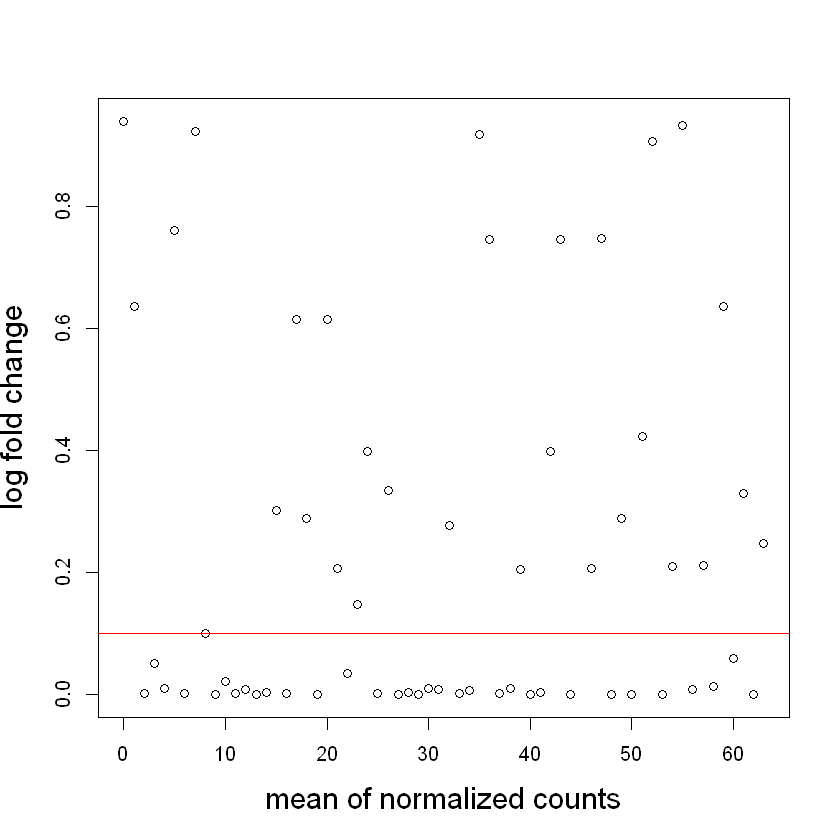

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 34 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
44   172.3732       0.498318 0.0899145   5.54214 2.98803e-08 1.88246e-06
40   182.7025       0.758142 0.1419872   5.33951 9.31968e-08 2.93570e-06
50   188.2888       0.714992 0.1368310   5.22537 1.73807e-07 3.64995e-06
53    92.9895      -0.503579 0.1022214  -4.92636 8.37761e-07 1.31947e-05
62   104.8641      -0.613830 0.1331761  -4.60916 4.04301e-06 5.09420e-05
...       ...            ...       ...       ...         ...         ...
10    93.3999      -0.322025  0.125270  -2.57066   0.0101505   0.0213161
22    31.5082      -0.385034  0.161389  -2.38575   0.0170445   0.0346388
3    110.1487      -0.252225  0.113446  -2.22331   0.0261949   0.0515712
60   156.7795       0.228430  0.105818   2.15871   0.0308723   0.0589380
8    121.9710       0.198494  0.10

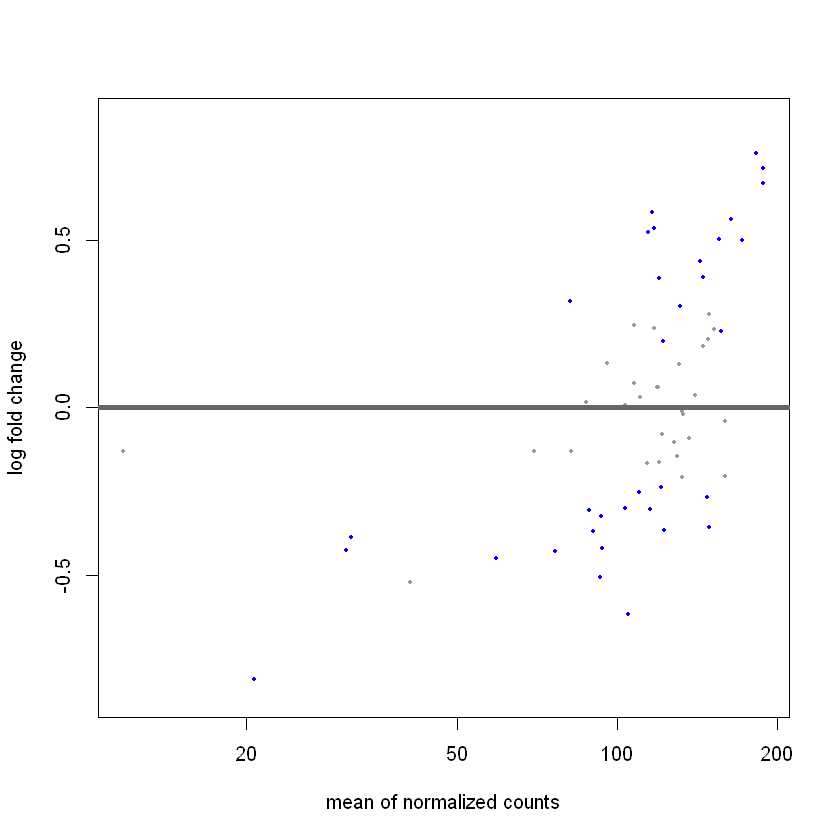

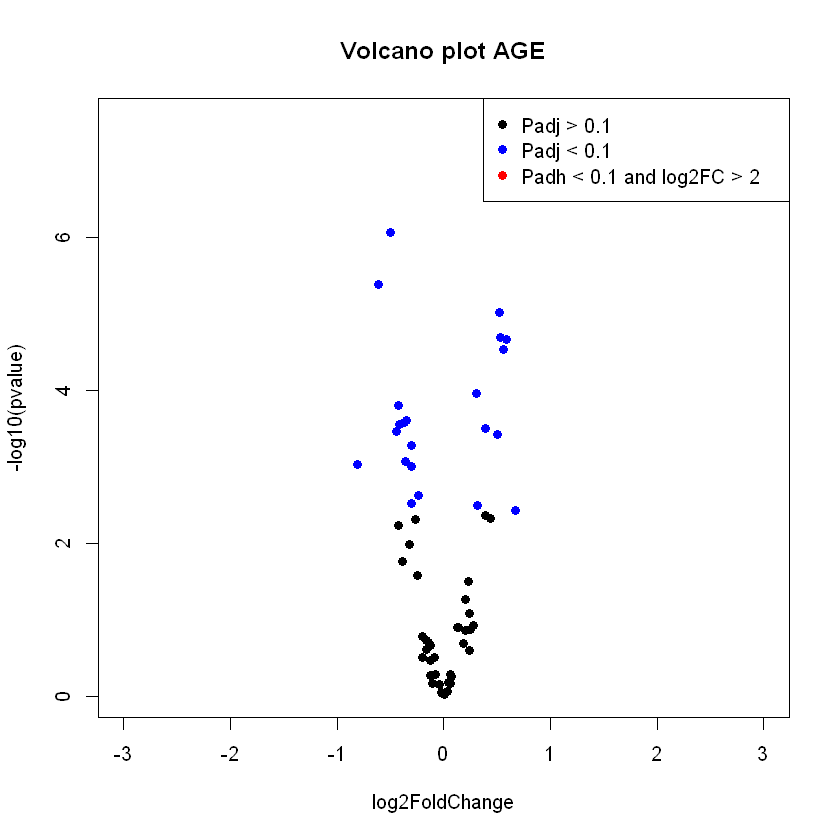

In [8]:
morph_analysis("AGE", ~ AGE, FALSE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 22, 34%
LFC < 0 (down)     : 7, 11%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



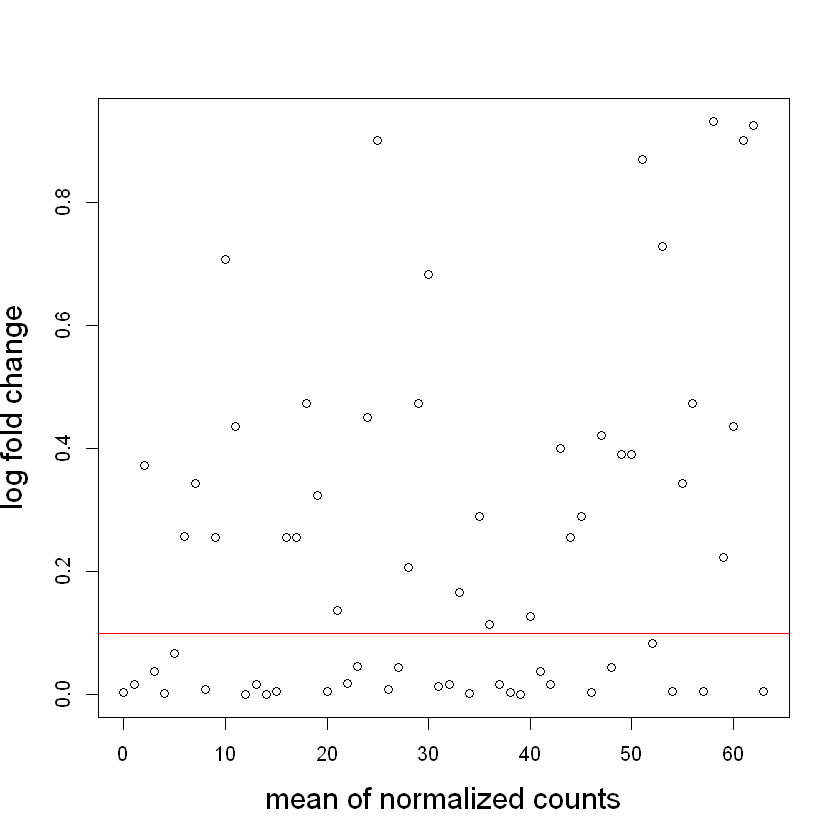

log2 fold change (MLE): HGHT 
Wald test p-value: HGHT 
DataFrame with 29 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
14    16.9777       1.332258 0.2283033   5.83547 5.36382e-09 3.43285e-07
39   149.2784       0.789708 0.1709141   4.62050 3.82823e-06 1.22503e-04
12   188.9150       0.977163 0.2232993   4.37602 1.20865e-05 2.57846e-04
4    143.5815       0.577931 0.1515637   3.81312 1.37224e-04 1.88049e-03
34   121.0148      -0.288979 0.0761225  -3.79623 1.46913e-04 1.88049e-03
...       ...            ...       ...       ...         ...         ...
27   163.8442      -0.326394  0.137668  -2.37087   0.0177461   0.0439845
48   116.5553       0.332471  0.140382   2.36833   0.0178687   0.0439845
23   152.3163      -0.315793  0.134825  -2.34224   0.0191682   0.0454357
5    159.5815      -0.226198  0.103603  -2.18331   0.0290131   0.0663158
52    87.5592      -0.318360  0.

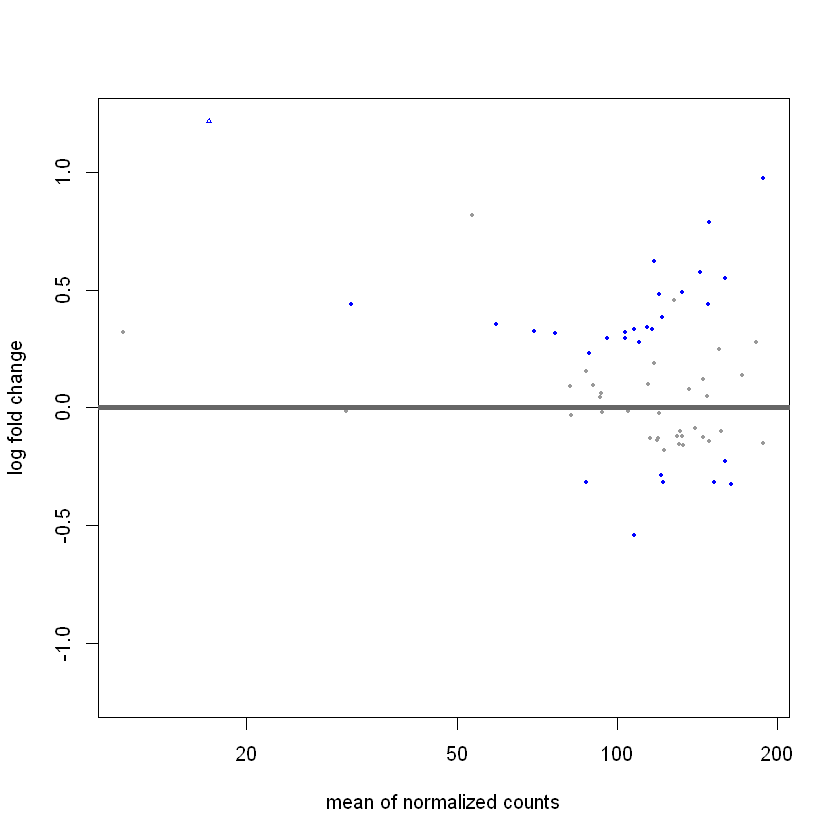

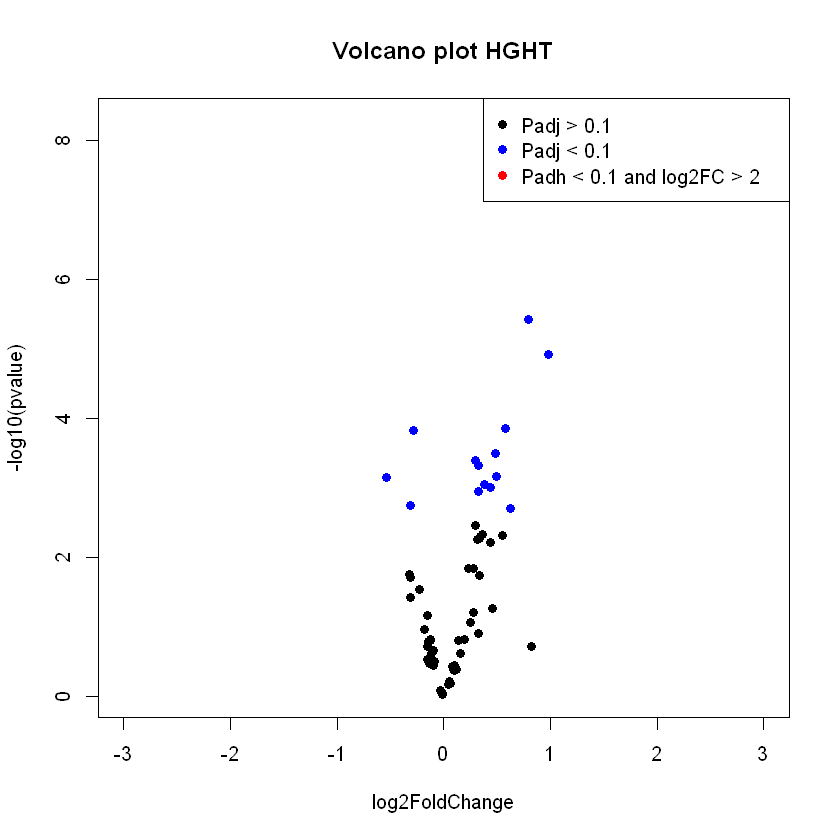

In [22]:
morph_analysis("HGHT", ~ HGHT, FALSE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 23, 36%
LFC < 0 (down)     : 6, 9.4%
outliers [1]       : 2, 3.1%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



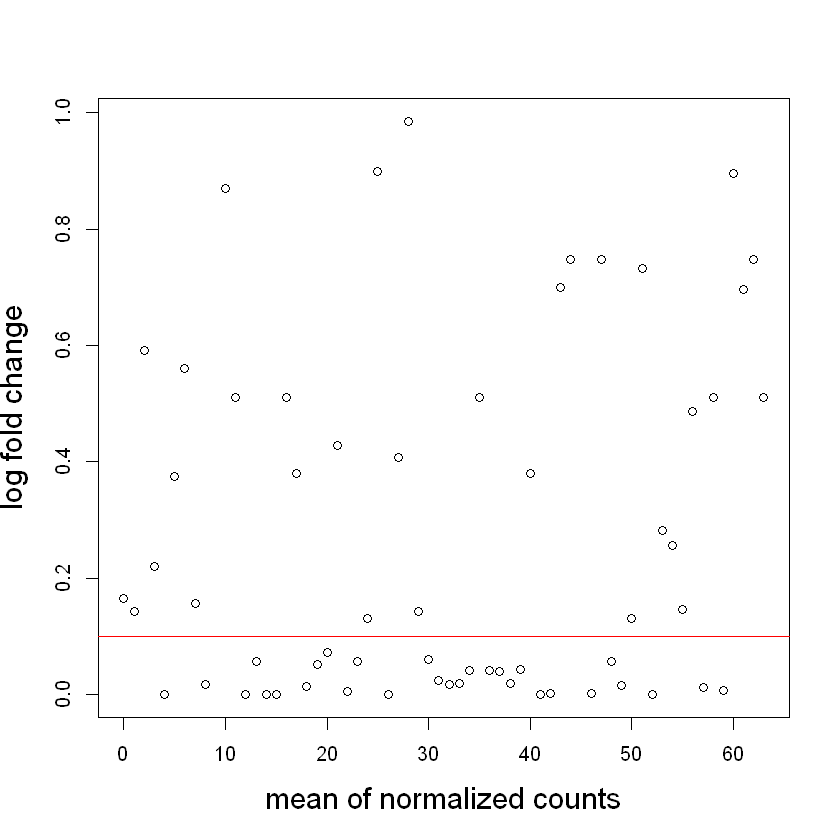

log2 fold change (MLE): WGHT 
Wald test p-value: WGHT 
DataFrame with 29 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
14    23.5089       1.503940  0.237045   6.34453 2.23101e-10 1.38323e-08
26   117.5627       0.939168  0.197789   4.74833 2.05108e-06 6.35834e-05
15    69.6019       0.434073  0.098165   4.42187 9.78524e-06 2.02228e-04
4    143.5815       0.636467  0.150600   4.22621 2.37664e-05 3.51176e-04
12   188.9150       0.942531  0.227391   4.14498 3.39848e-05 3.51176e-04
...       ...            ...       ...       ...         ...         ...
13    76.3889       0.262872 0.1157411   2.27121   0.0231342   0.0570954
23   152.3163      -0.303452 0.1347088  -2.25266   0.0242809   0.0570954
48   116.5553       0.315363 0.1405669   2.24351   0.0248641   0.0570954
30   147.6561       0.211521 0.0960697   2.20174   0.0276835   0.0612991
20   121.3658       0.249928 0.1

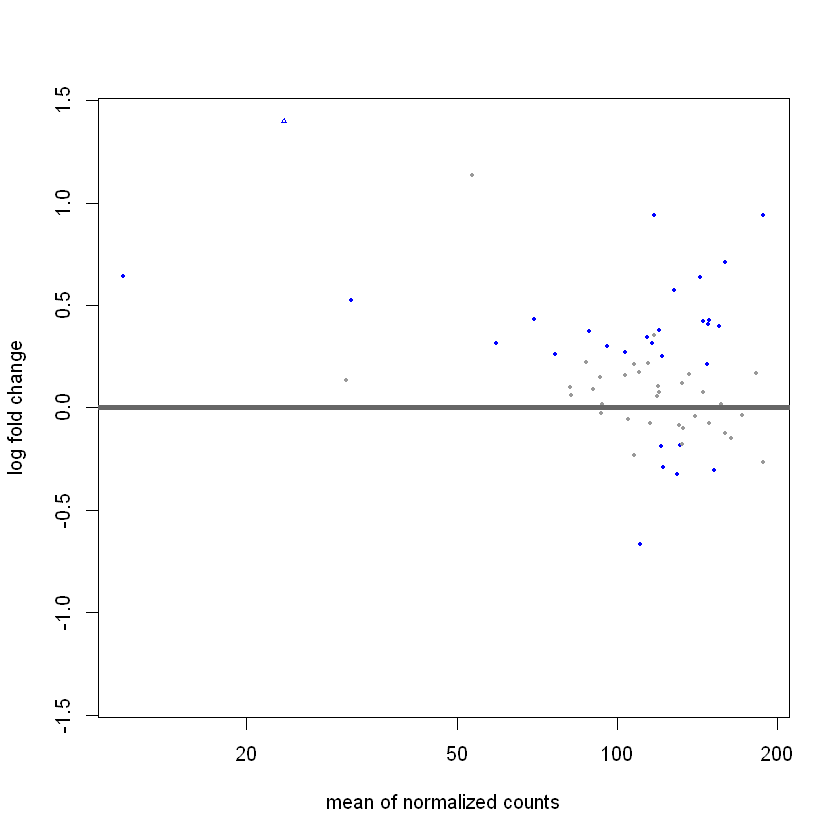

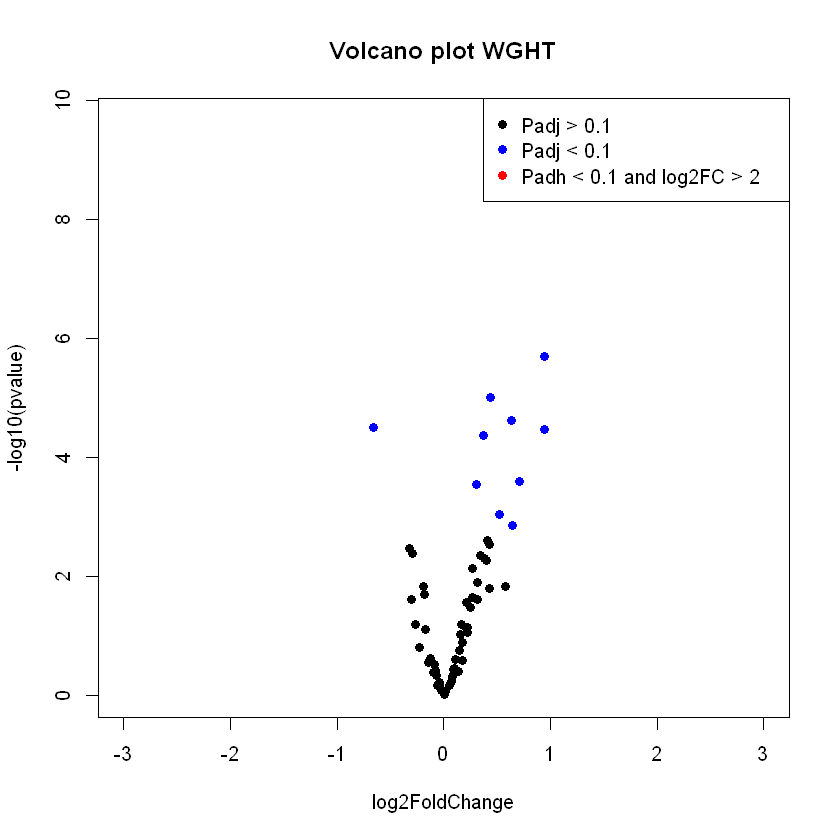

In [9]:
morph_analysis("WGHT", ~ WGHT, FALSE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 10, 16%
LFC < 0 (down)     : 2, 3.1%
outliers [1]       : 3, 4.7%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



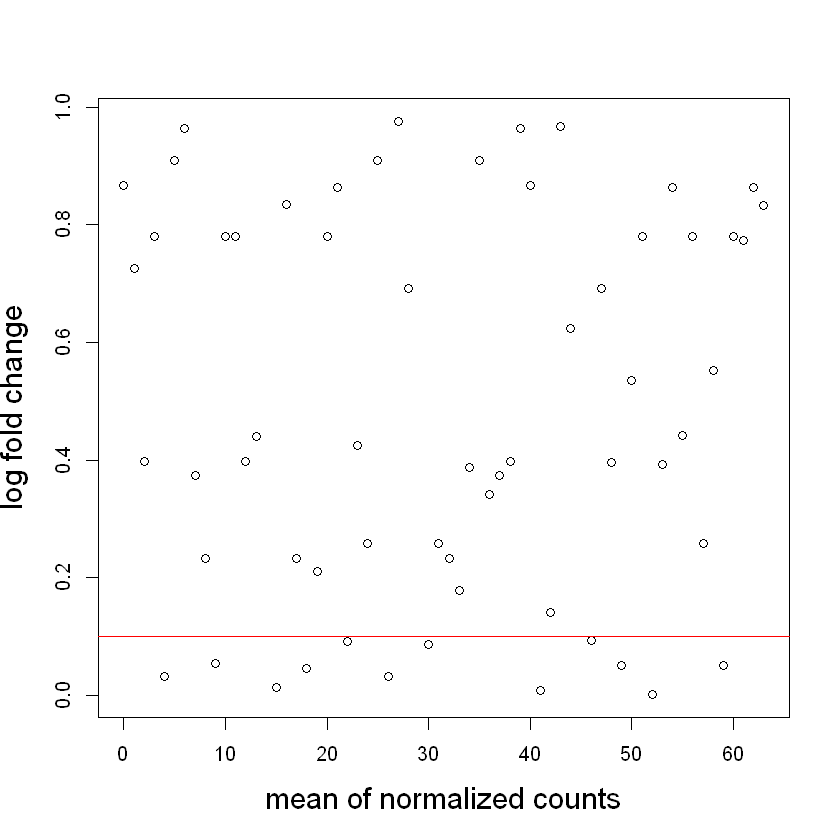

log2 fold change (MLE): BMI 
Wald test p-value: BMI 
DataFrame with 12 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
52   110.6787      -0.694680 0.1602130  -4.33598 1.45115e-05 0.000885199
41    88.5211       0.336380 0.0924386   3.63896 2.73742e-04 0.008349142
15    69.6019       0.344311 0.1008254   3.41492 6.38008e-04 0.012972835
4    143.5815       0.467493 0.1539080   3.03748 2.38564e-03 0.031216741
26   117.5627       0.608892 0.2018669   3.01631 2.55875e-03 0.031216741
...       ...            ...       ...       ...         ...         ...
59    11.7334       0.559184 0.2036566   2.74572  0.00603784   0.0506357
9    117.5544       0.343674 0.1293614   2.65670  0.00789101   0.0534835
30   147.6561       0.235439 0.0960296   2.45174  0.01421691   0.0867231
22    31.5082       0.387541 0.1614675   2.40012  0.01638976   0.0908886
46    95.8441       0.200709 0.084

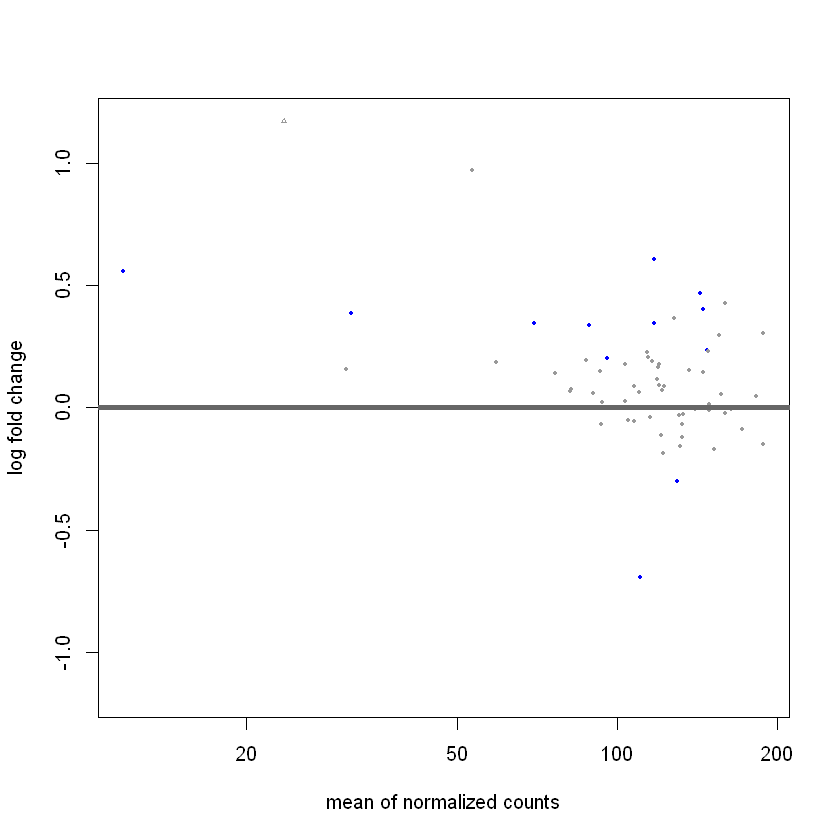

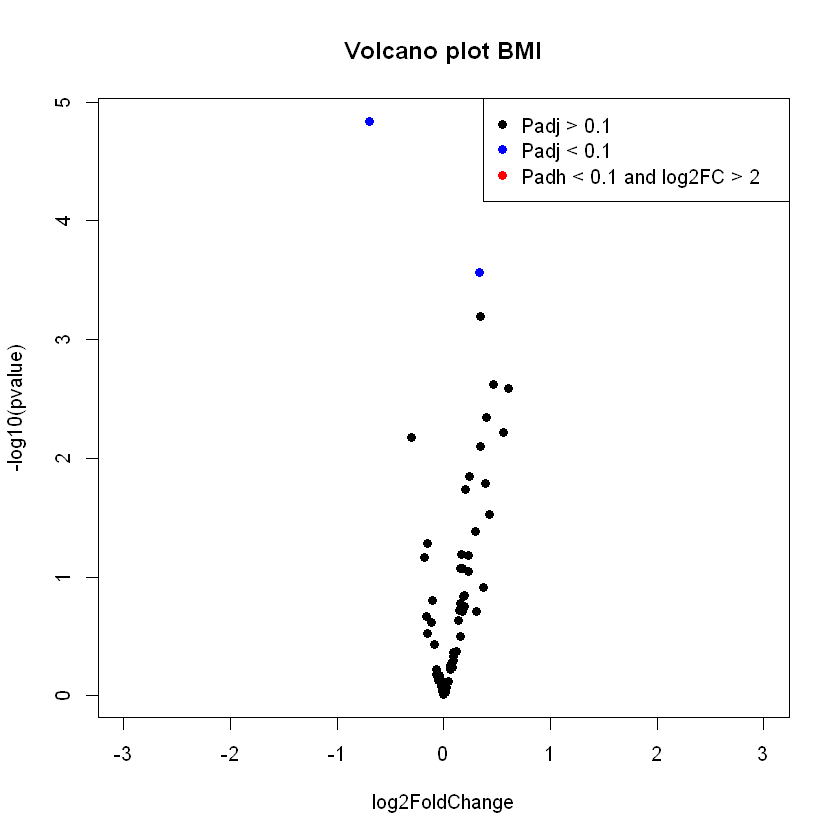

In [10]:
morph_analysis("BMI", ~BMI, FALSE)

### Q2.2 - Technical variables vs. morphology

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 8 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 25, 39%
LFC < 0 (down)     : 25, 39%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



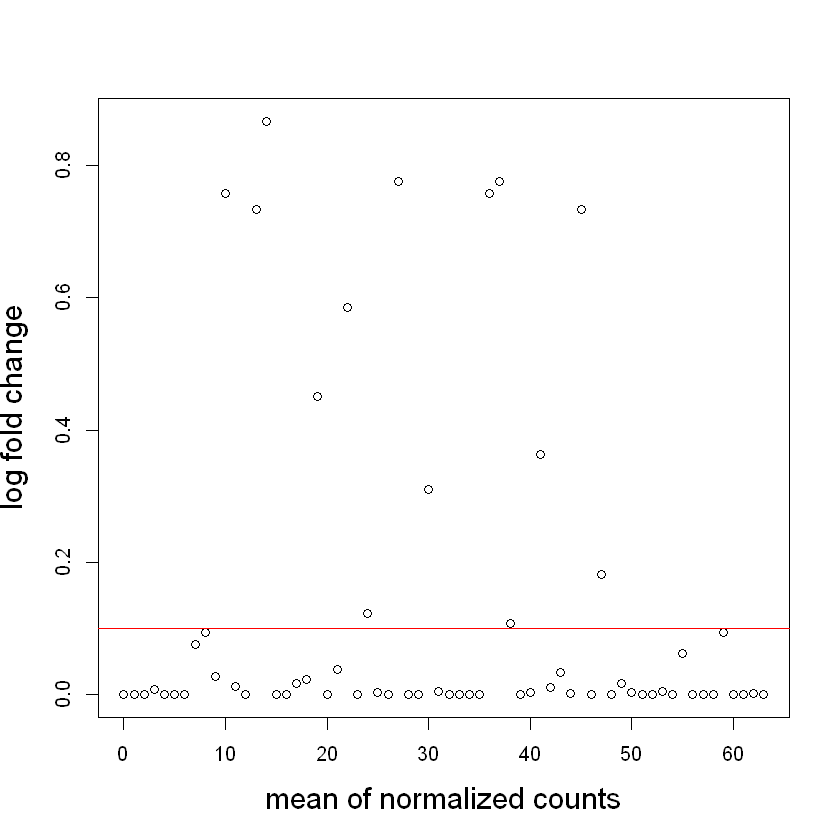

log2 fold change (MLE): COHORT P vs O 
Wald test p-value: COHORT P vs O 
DataFrame with 50 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
57    148.241        2.34432  0.217897  10.75884 5.38421e-27 3.44589e-25
33    155.450        2.41645  0.236885  10.20096 1.96322e-24 6.28231e-23
48    116.555        2.28969  0.233212   9.81806 9.41351e-23 2.00822e-21
12    188.915        3.79242  0.400244   9.47527 2.66064e-21 4.25703e-20
35    133.194       -1.90066  0.201448  -9.43501 3.90950e-21 5.00417e-20
...       ...            ...       ...       ...         ...         ...
21   130.7797      -0.371828  0.168324  -2.20901   0.0271740   0.0378073
55   132.8157       0.402014  0.201139   1.99869   0.0456419   0.0621507
7     87.3322      -0.495374  0.260611  -1.90082   0.0573260   0.0764347
8    121.9710      -0.367821  0.205356  -1.79114   0.0732714   0.0937874
59    10.4150 

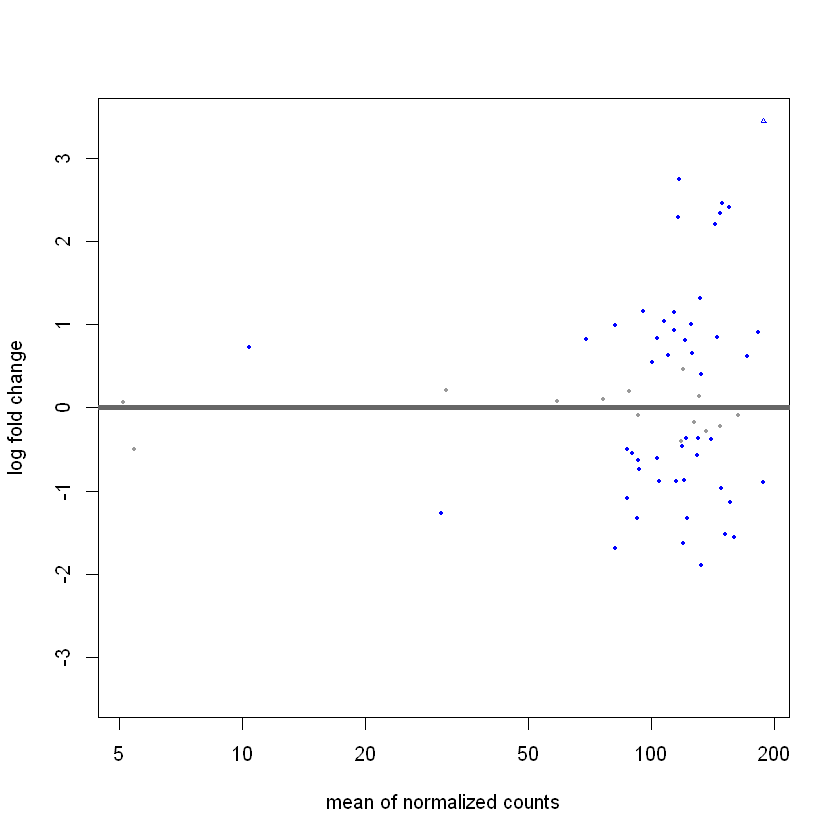

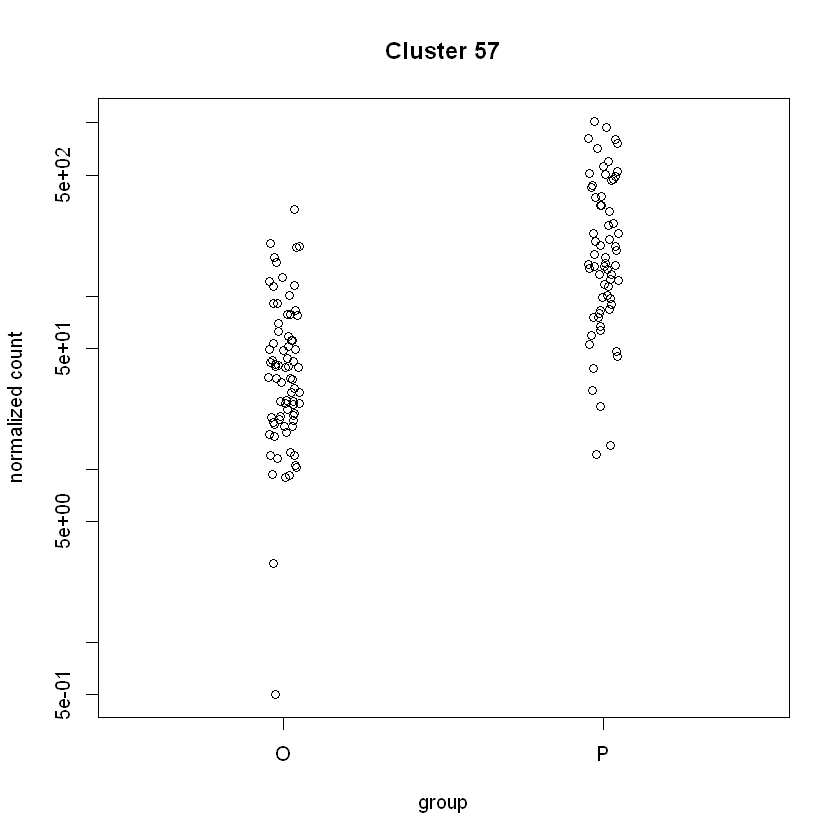

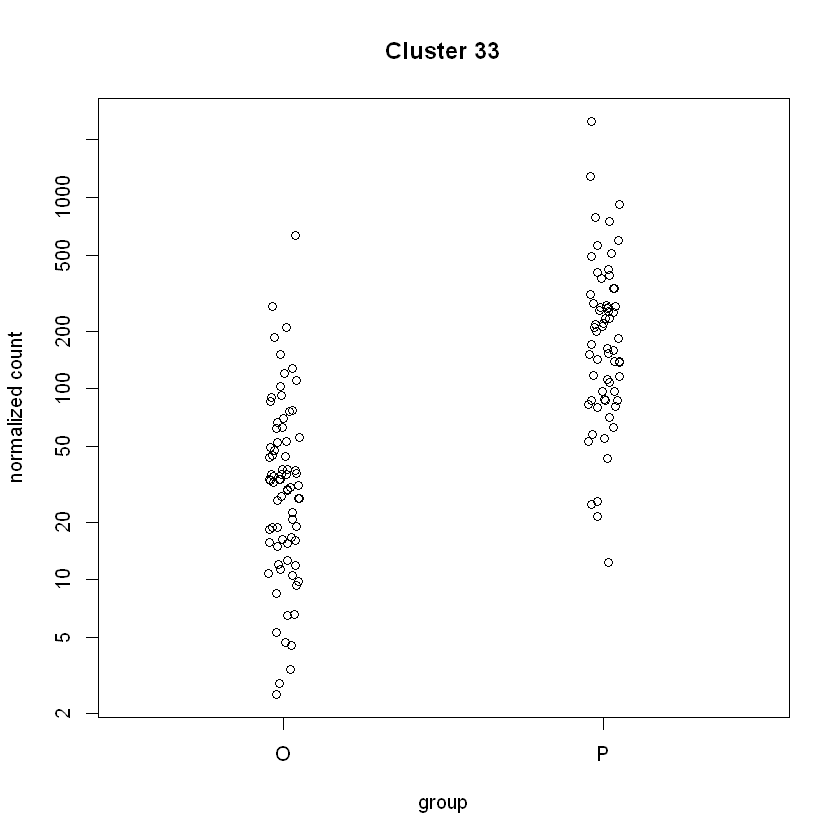

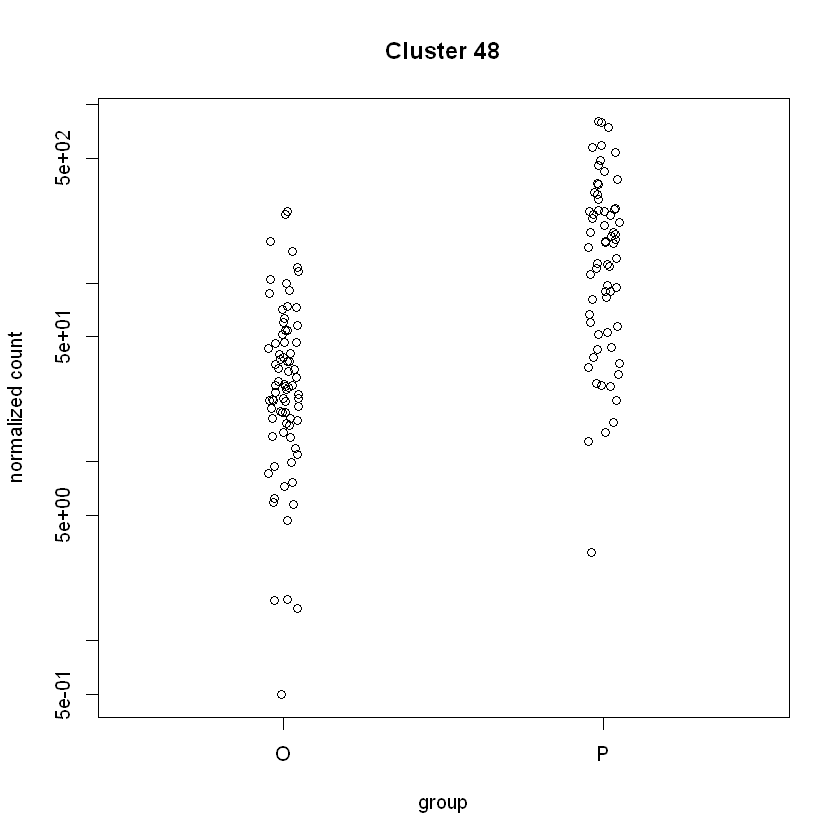

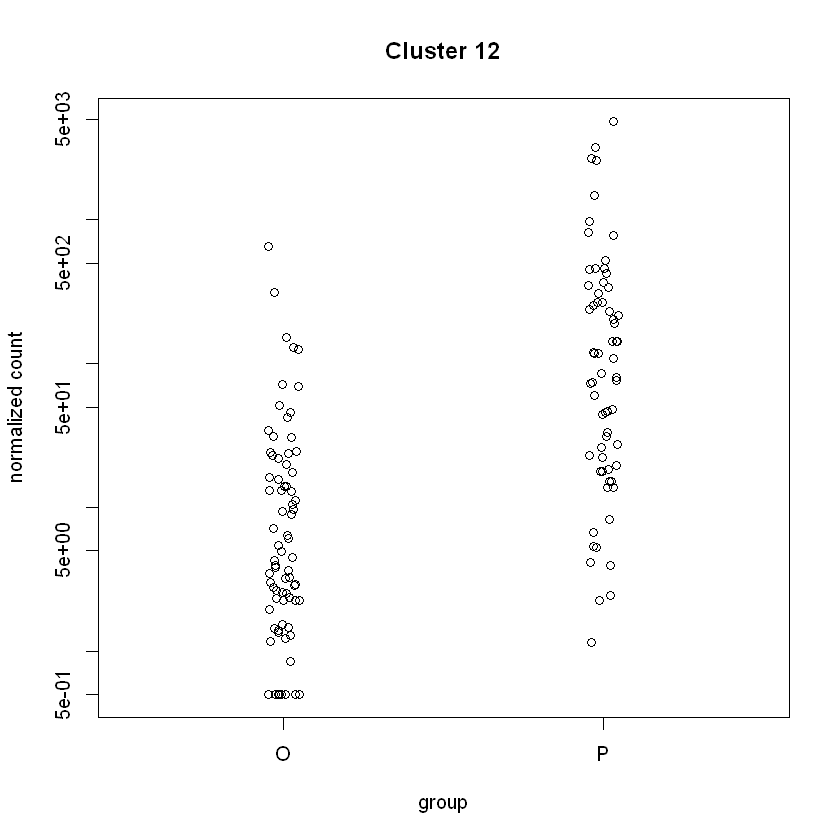

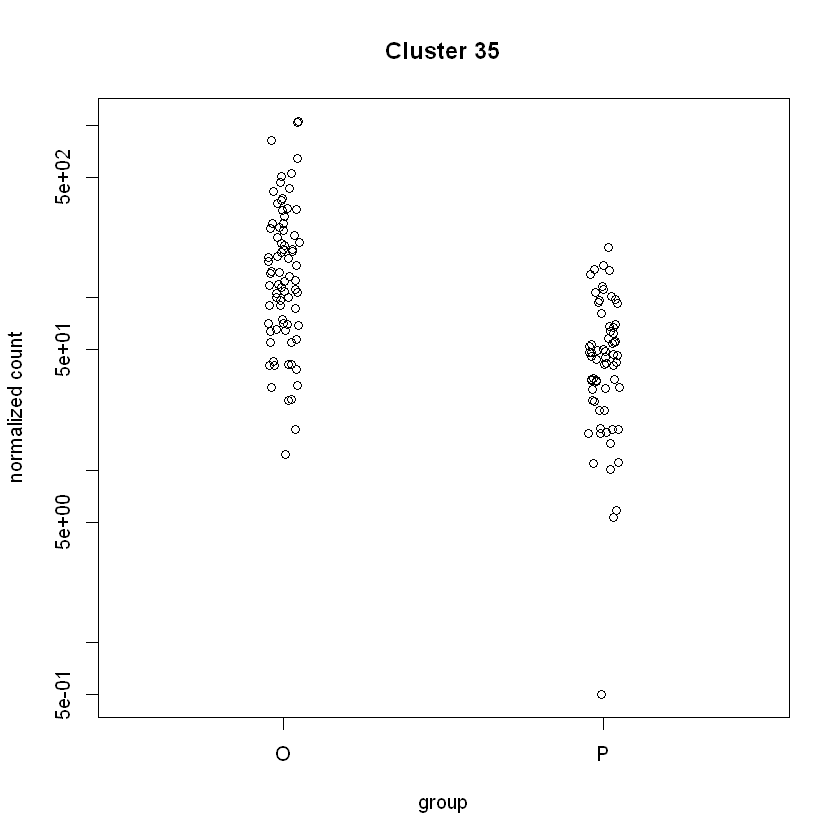

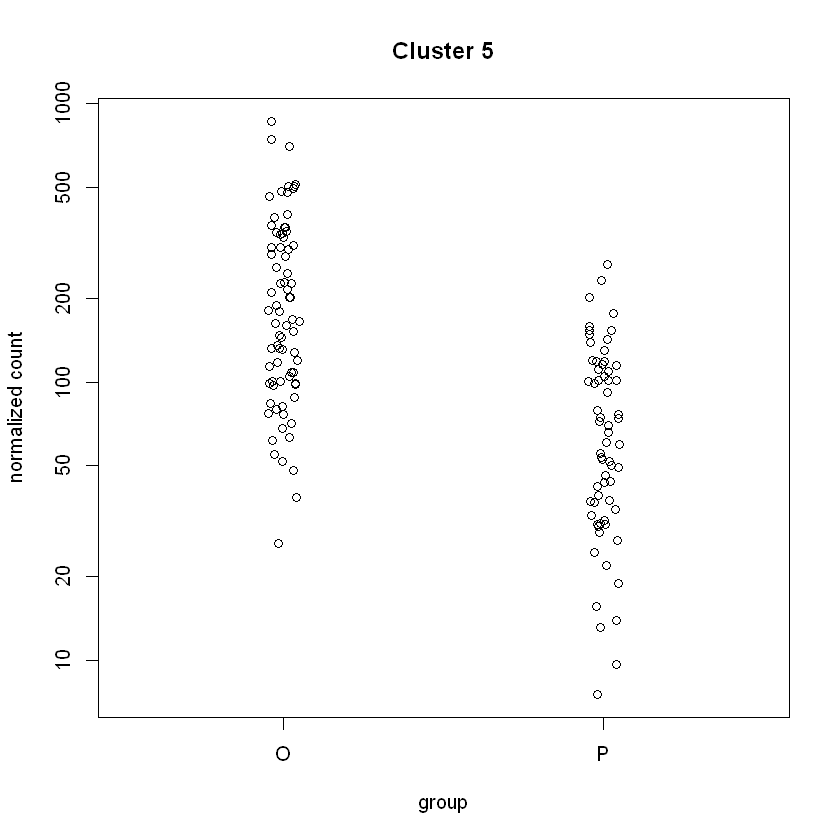

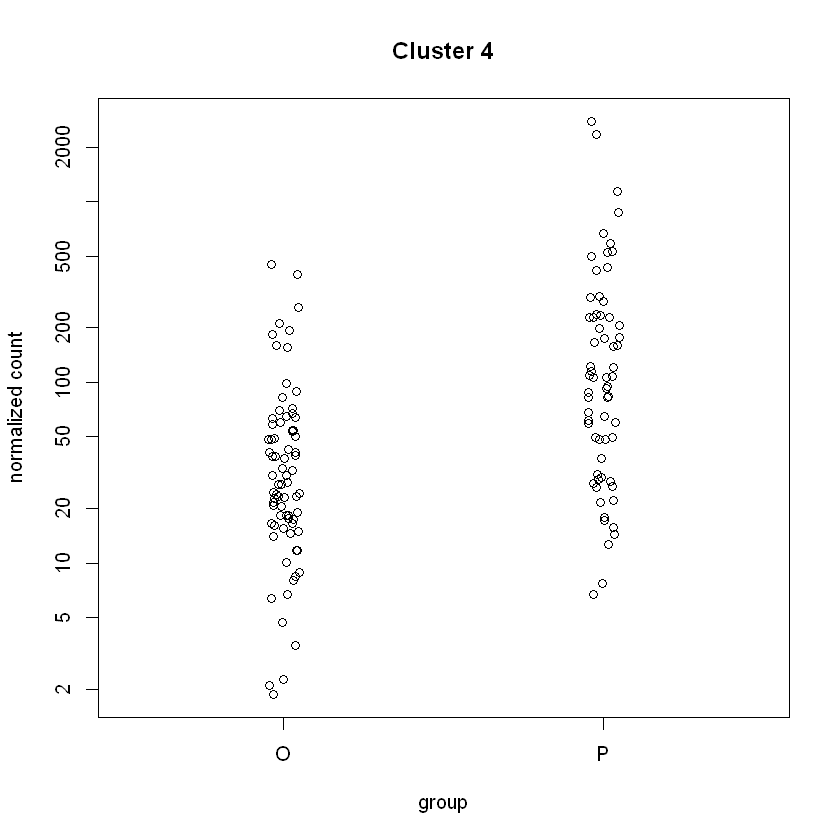

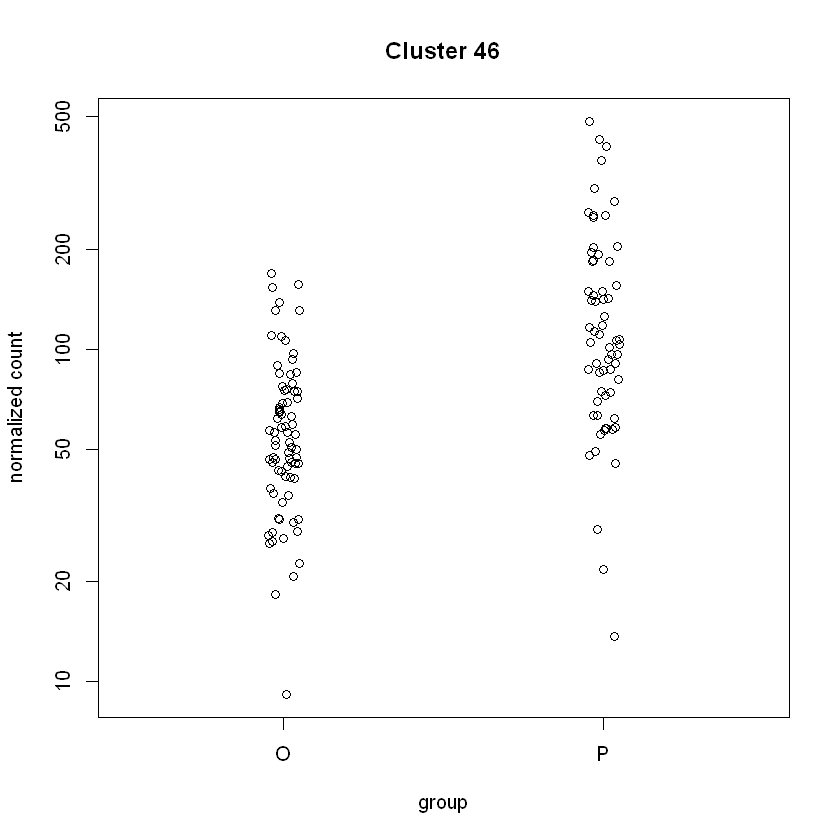

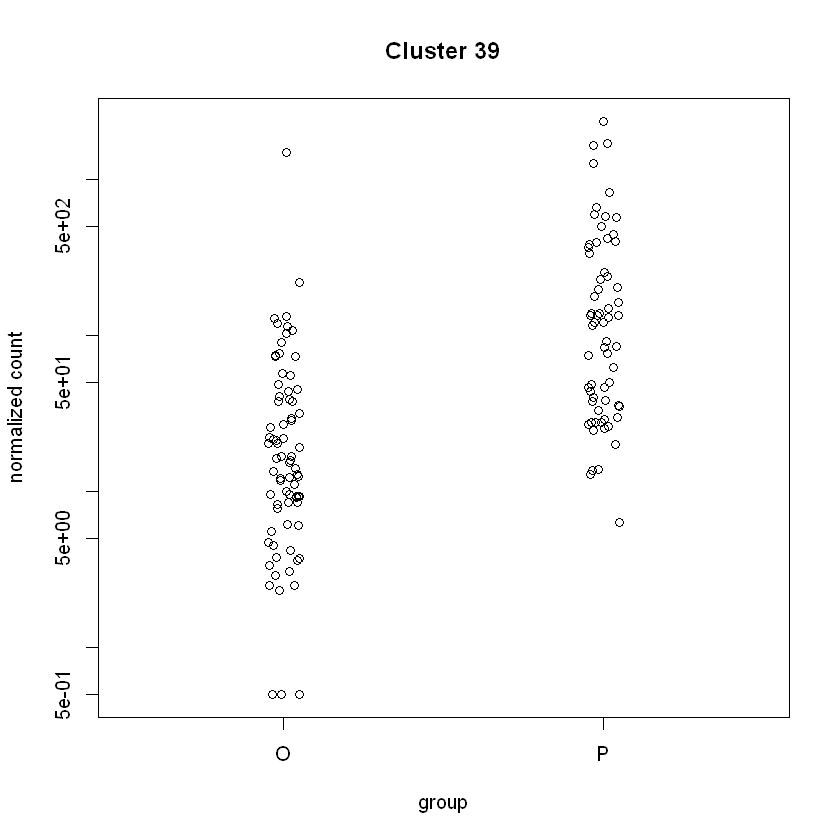

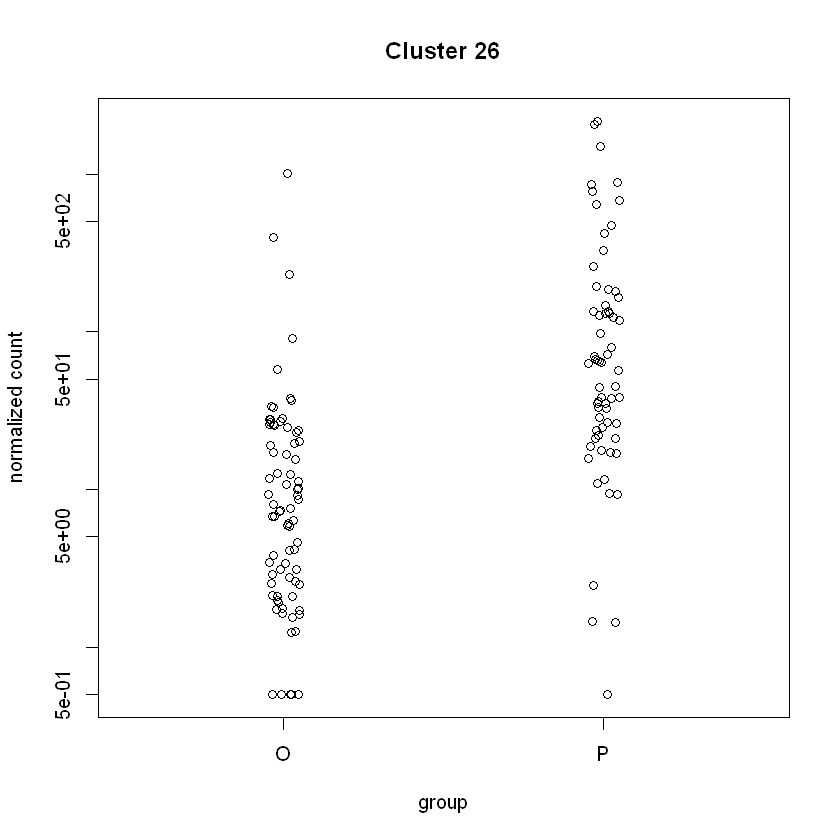

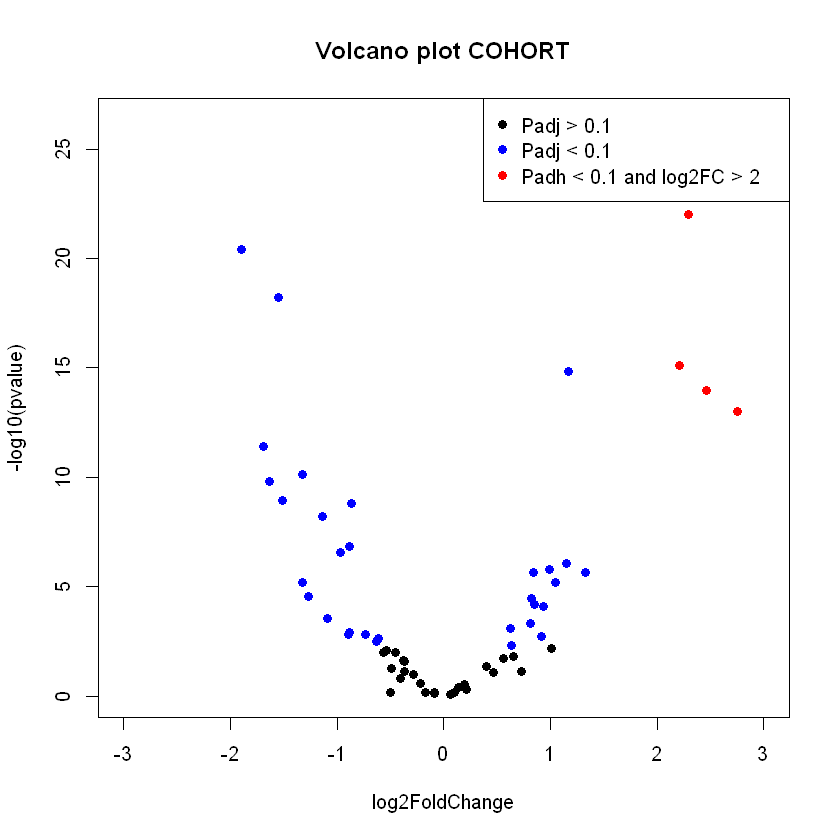

In [19]:
morph_analysis("COHORT", ~ COHORT, TRUE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 15, 23%
LFC < 0 (down)     : 20, 31%
outliers [1]       : 1, 1.6%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



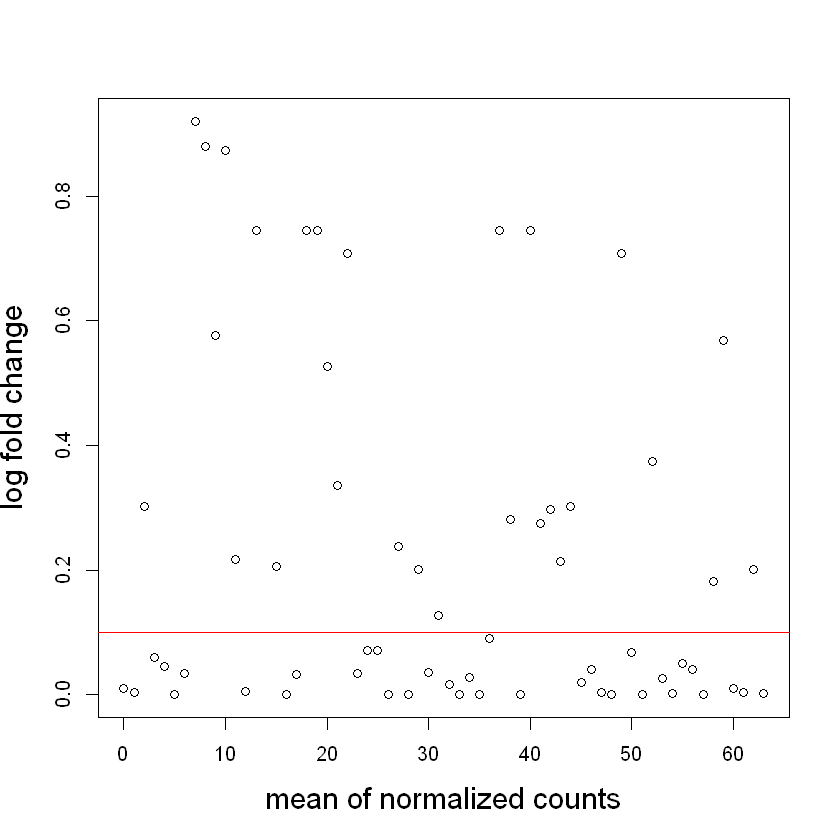

log2 fold change (MLE): DTHHRDY 4 vs 0 
Wald test p-value: DTHHRDY 4 vs 0 
DataFrame with 35 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
28    122.696       -1.87755  0.302180  -6.21333 5.18725e-10 1.97544e-08
35    133.194       -1.93637  0.313153  -6.18346 6.27125e-10 1.97544e-08
33    155.450        1.97710  0.368779   5.36120 8.26727e-08 1.73613e-06
5     159.582       -1.41964  0.269473  -5.26820 1.37765e-07 2.16980e-06
57    148.241        1.69382  0.338032   5.01083 5.41955e-07 6.82863e-06
...       ...            ...       ...       ...         ...         ...
3    110.1487       0.744137  0.341941   2.17622   0.0295390   0.0600309
50   188.2888      -0.902298  0.426150  -2.11733   0.0342322   0.0673946
24   136.7598      -0.550904  0.264670  -2.08147   0.0373905   0.0710444
25    93.5703      -0.727940  0.351461  -2.07119   0.0383414   0.0710444
36   127.937

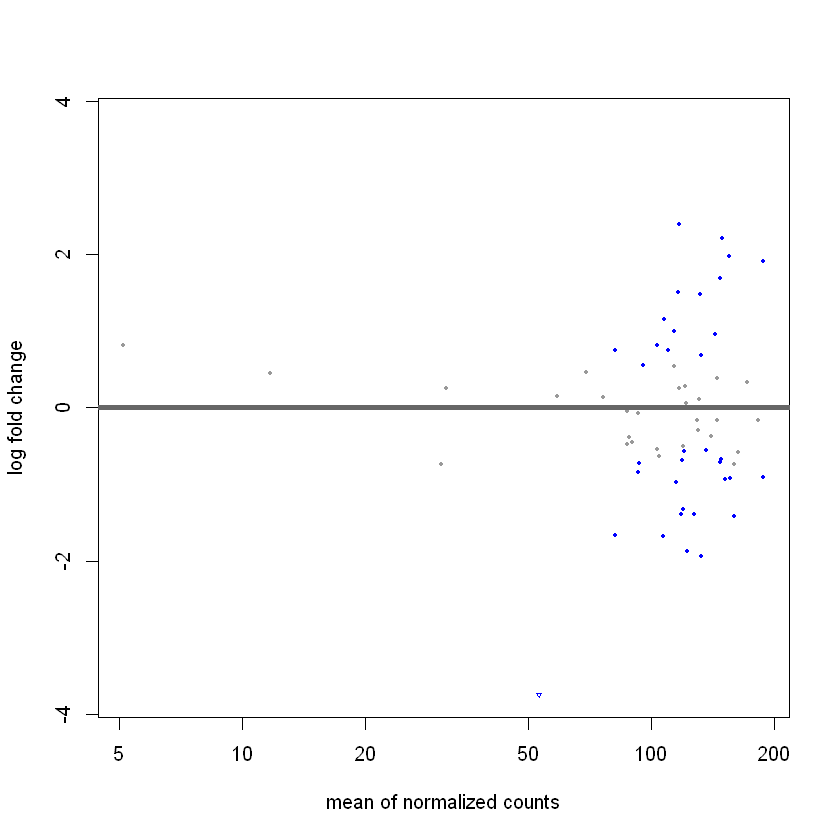

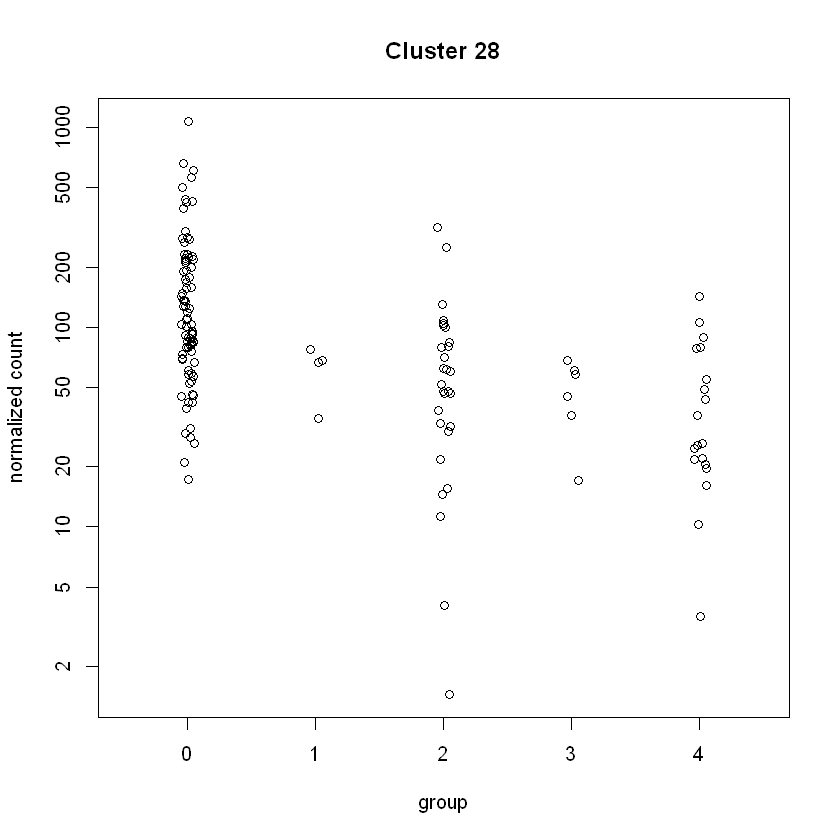

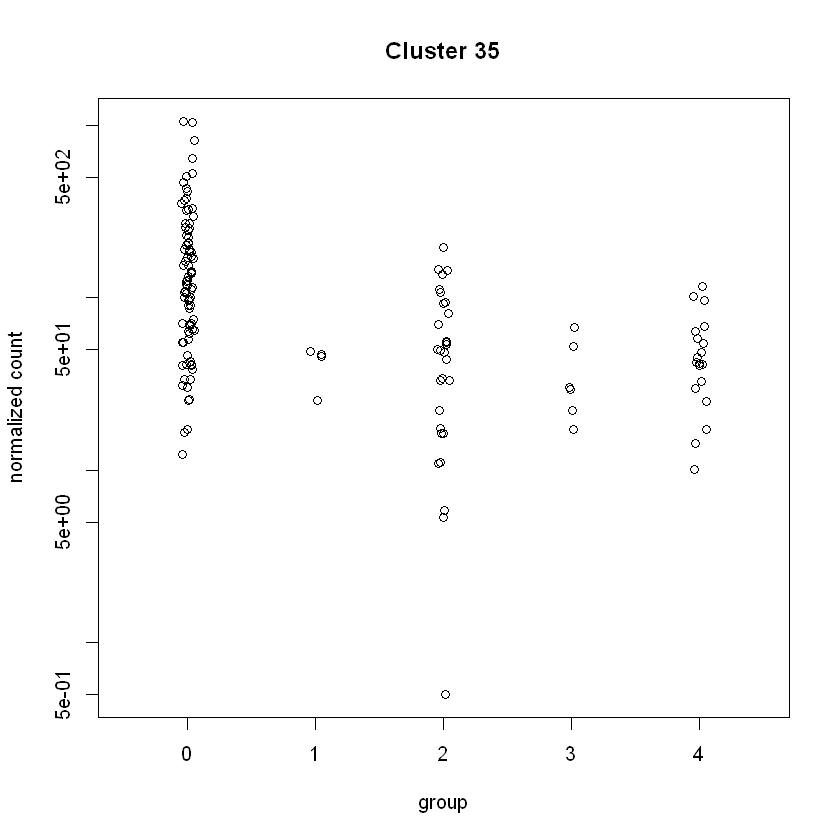

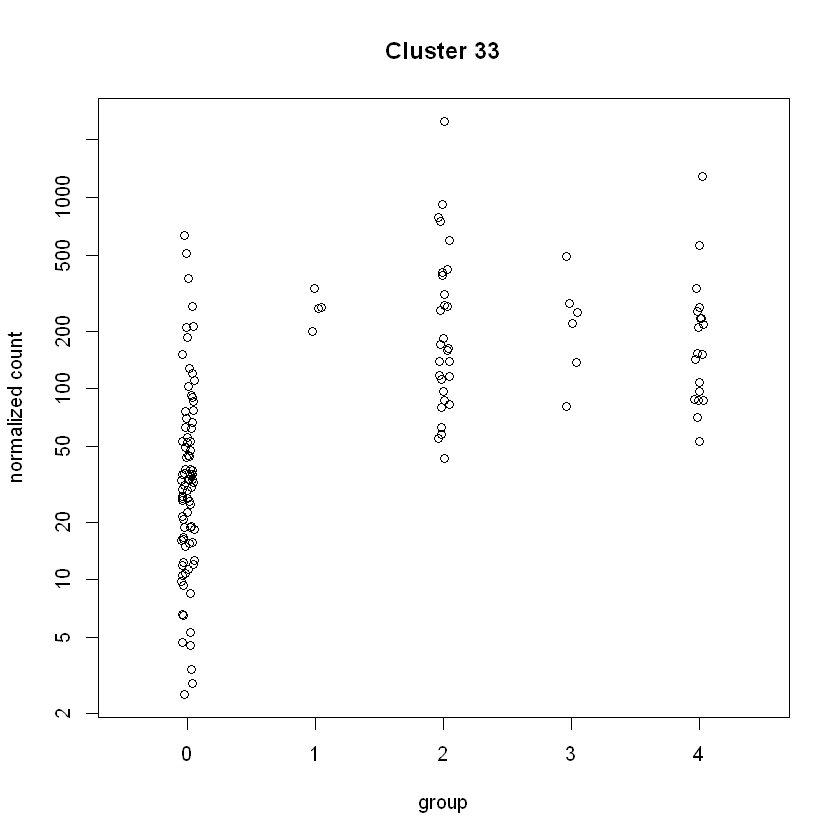

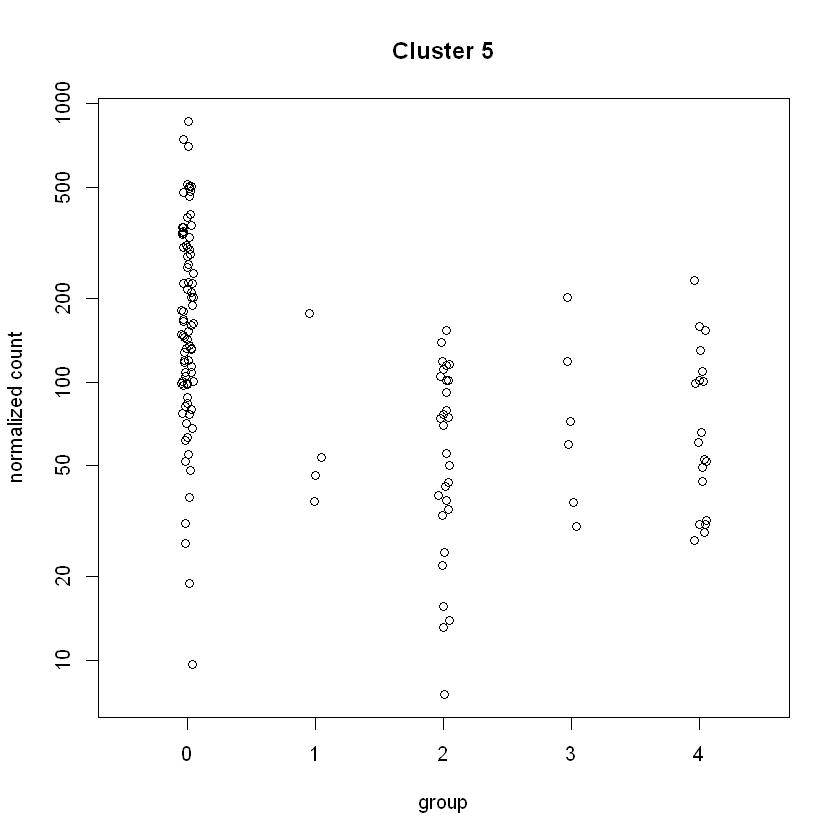

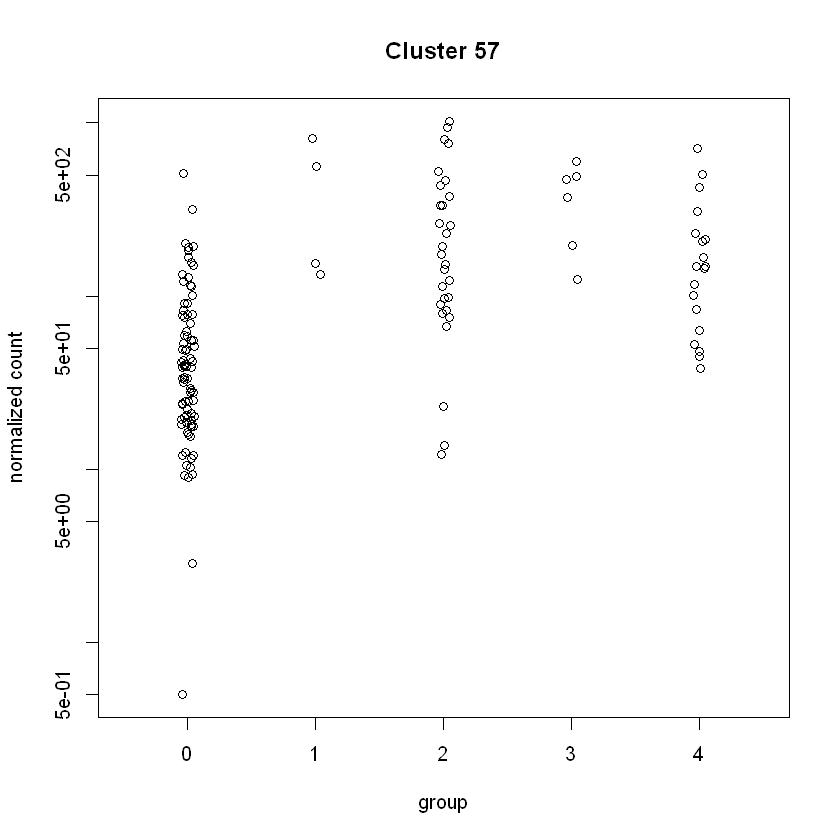

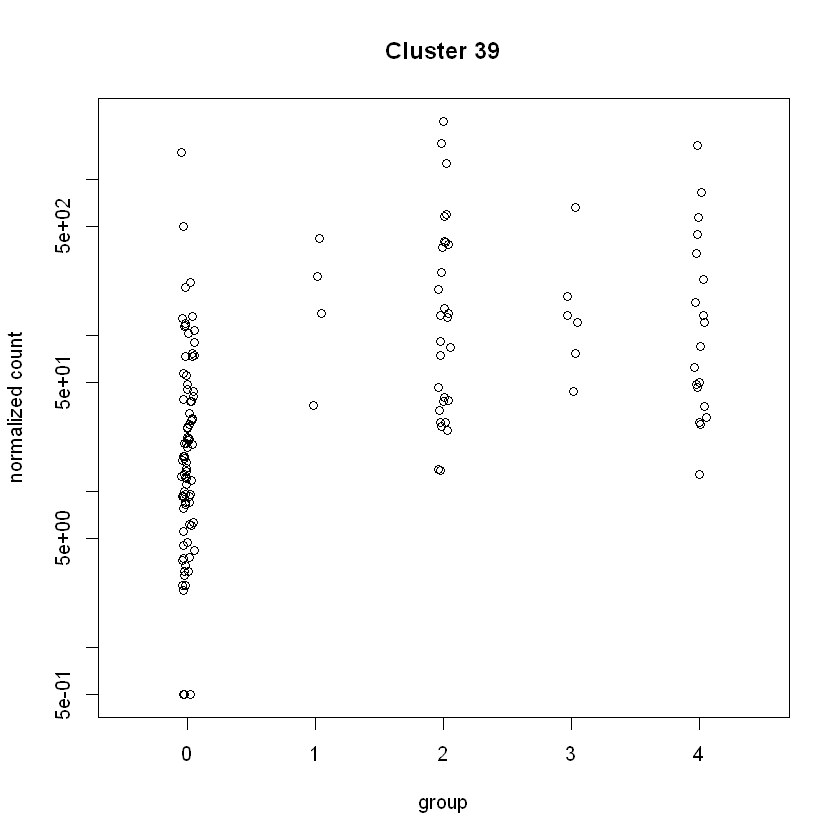

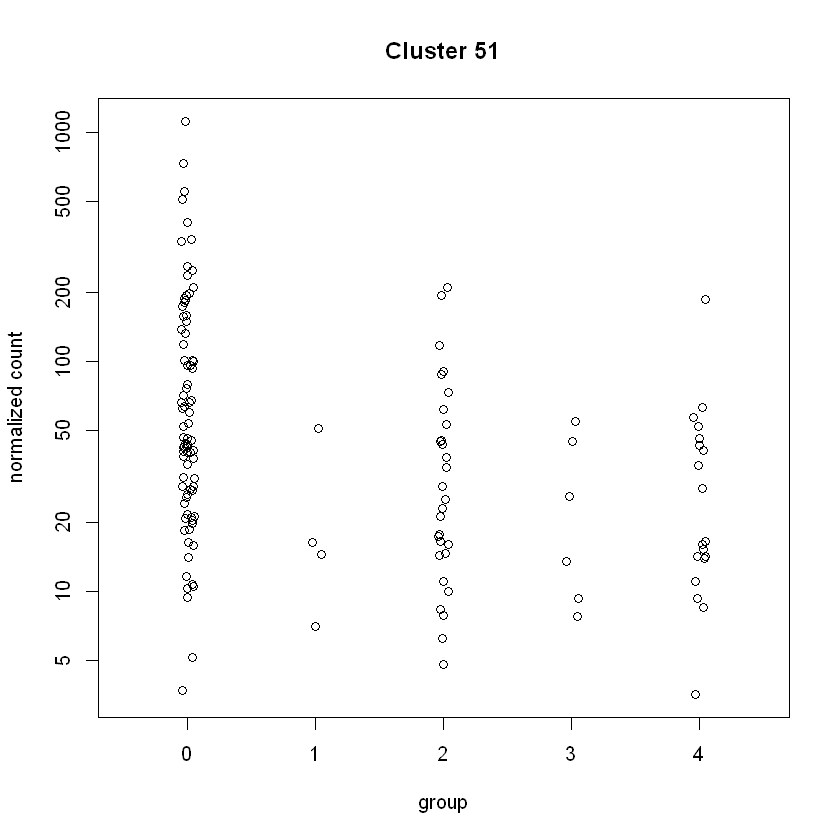

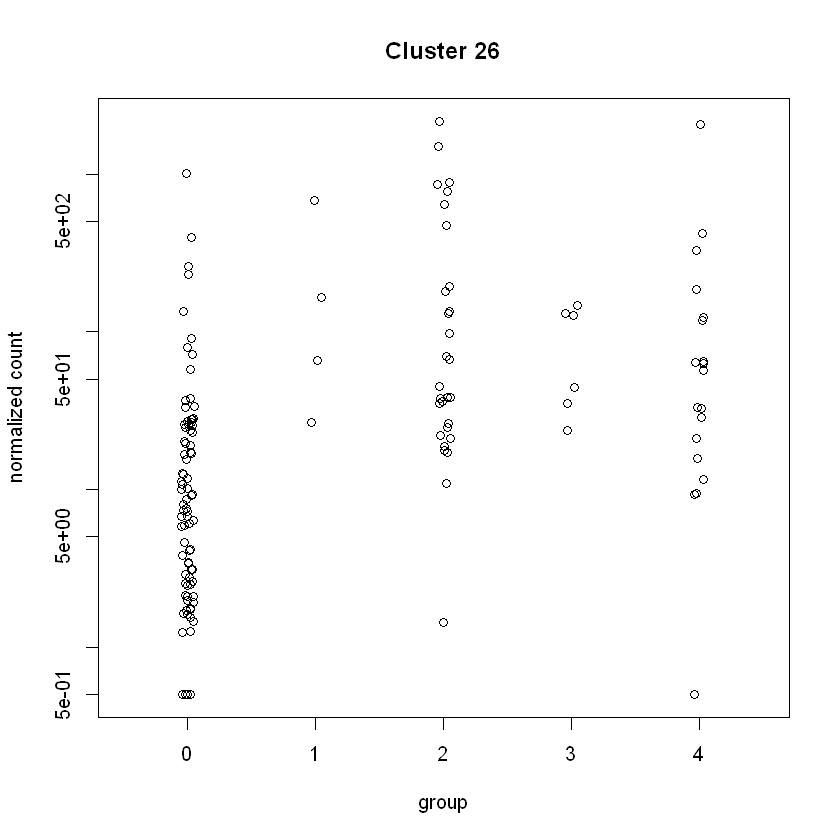

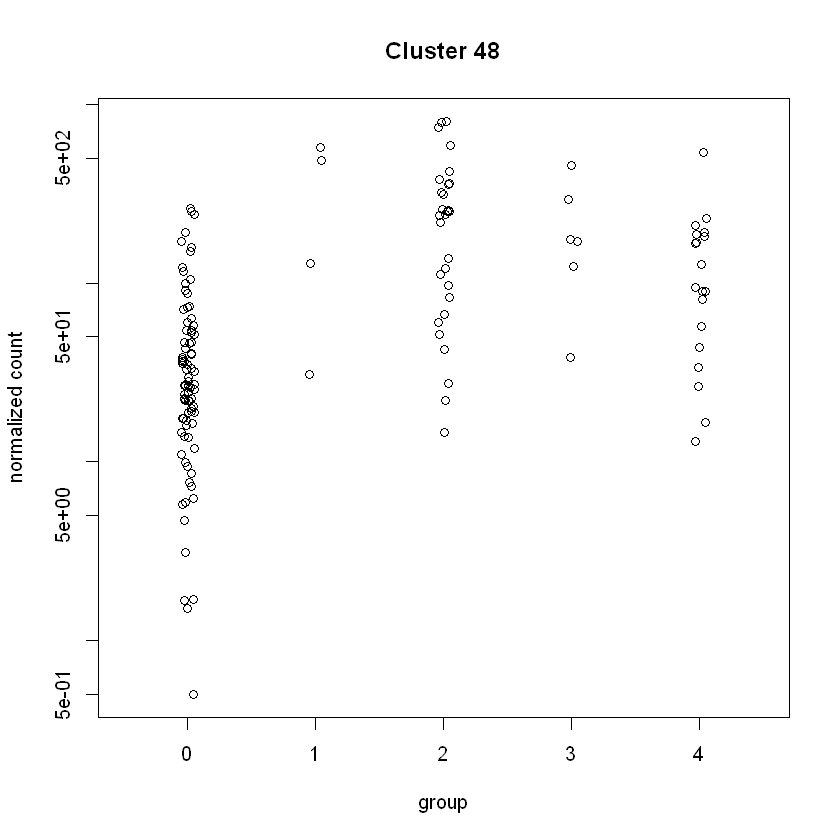

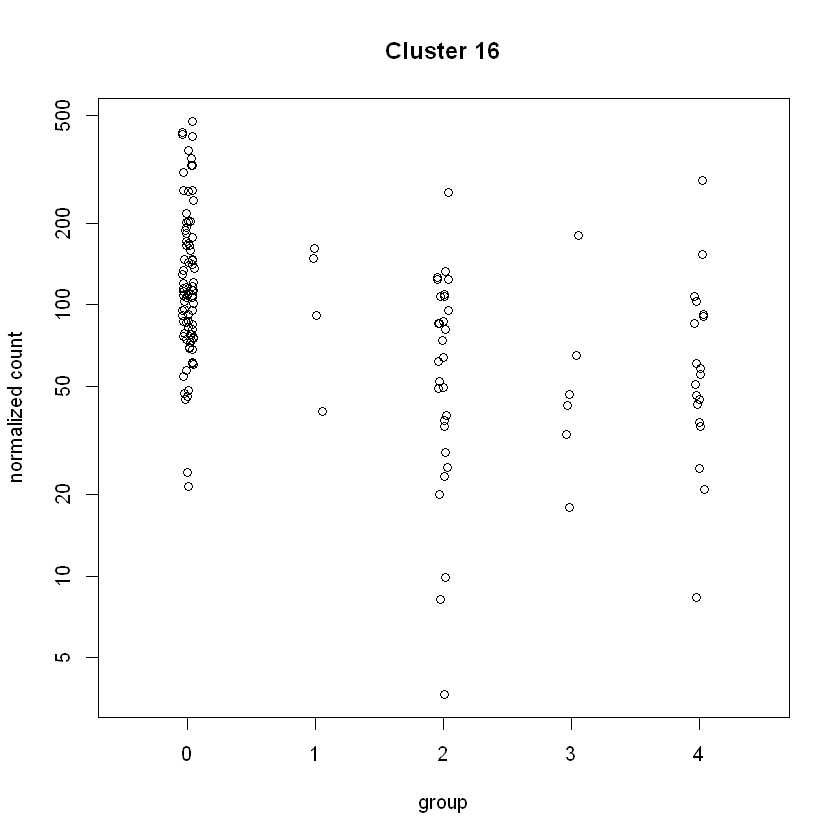

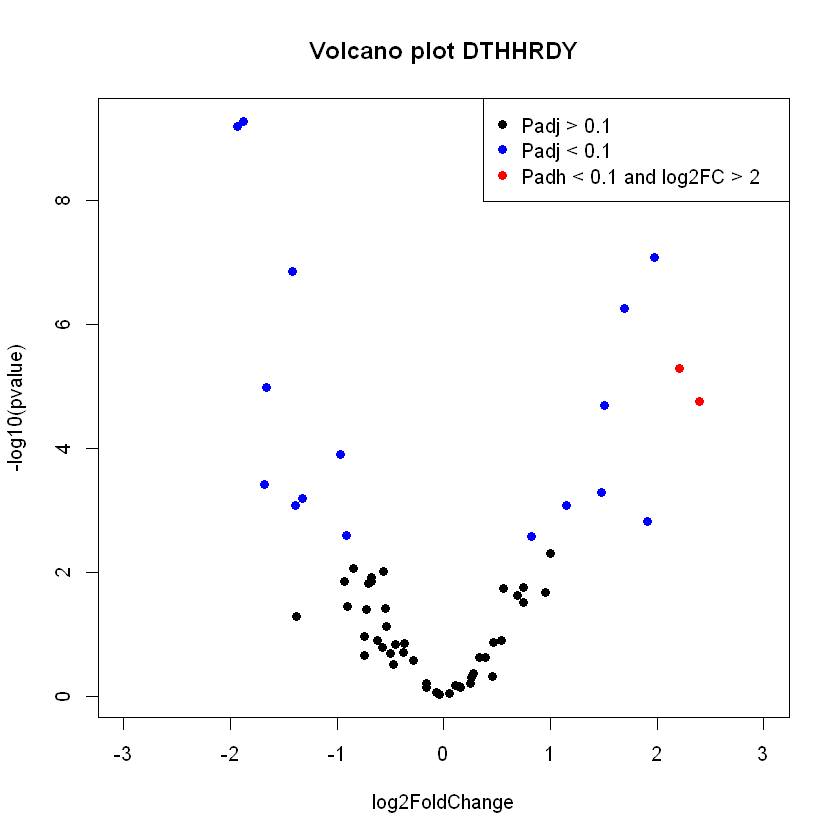

In [20]:
morph_analysis("DTHHRDY", ~ DTHHRDY, TRUE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 22, 34%
LFC < 0 (down)     : 23, 36%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



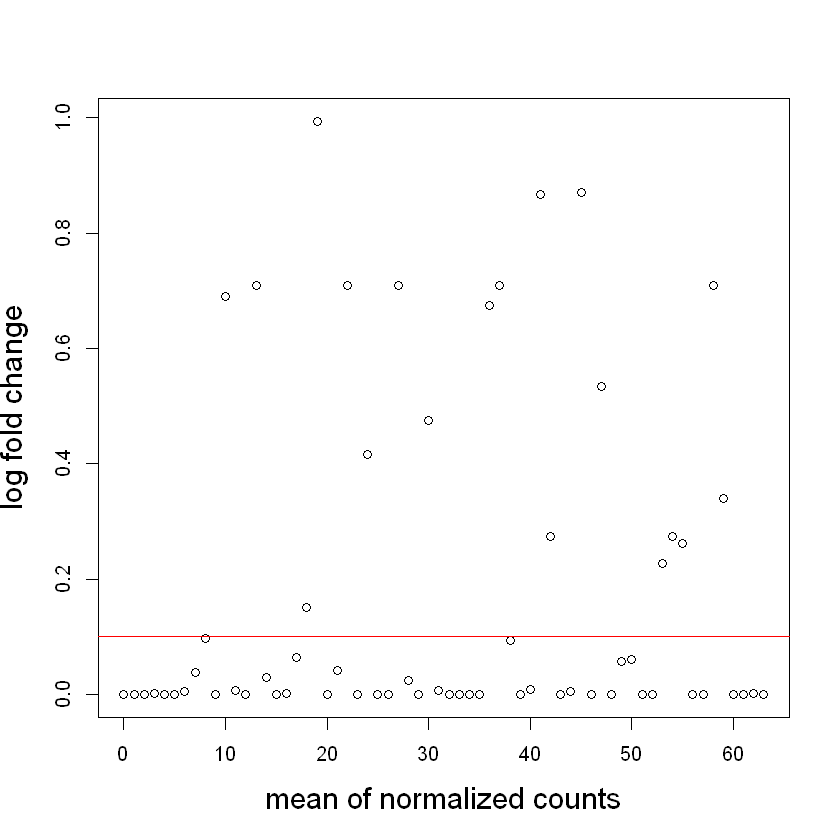

log2 fold change (MLE): TRISCHD 
Wald test p-value: TRISCHD 
DataFrame with 45 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
33    155.450        1.36573  0.114273  11.95146 6.37978e-33 4.08306e-31
39    149.278        1.68060  0.148912  11.28587 1.54111e-29 4.93156e-28
57    148.241        1.18617  0.112497  10.54408 5.40982e-26 1.15410e-24
26    117.563        1.75713  0.174605  10.06346 8.01306e-24 1.28209e-22
12    188.915        1.81290  0.204185   8.87874 6.76215e-19 8.65555e-18
...       ...            ...       ...       ...         ...         ...
49    129.846      -0.233258 0.1116254  -2.08965   0.0366494   0.0572089
50    188.289      -0.294193 0.1430206  -2.05700   0.0396865   0.0604747
17    119.358      -0.182794 0.0902285  -2.02591   0.0427745   0.0636643
38    119.988       0.252014 0.1363997   1.84761   0.0646584   0.0940486
8     121.971      -0.1870

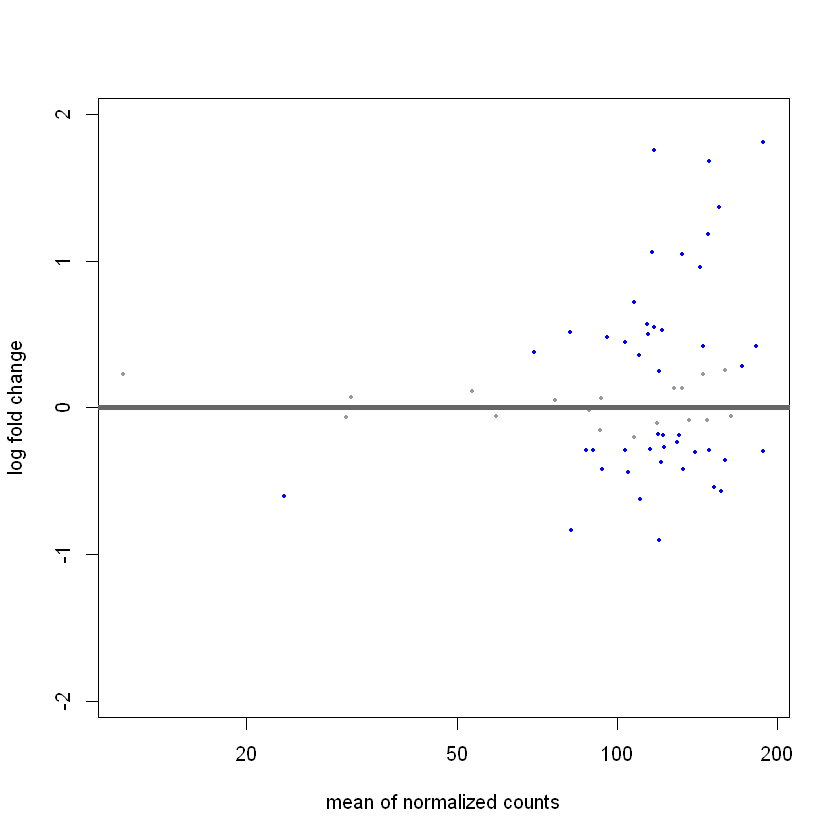

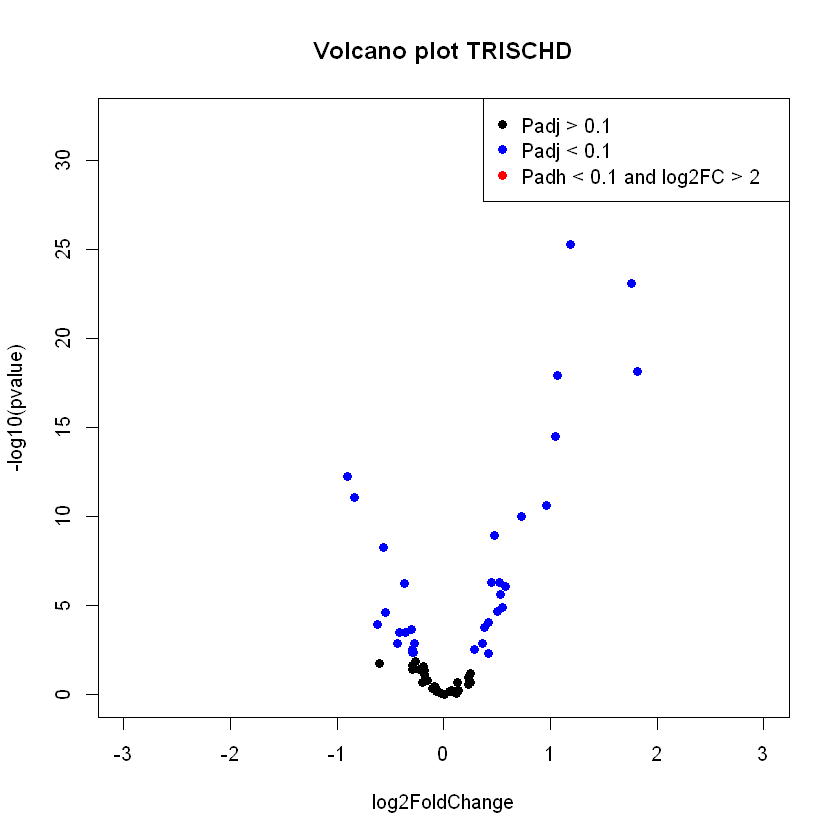

In [16]:
morph_analysis("TRISCHD", ~TRISCHD, FALSE)

### Q2.3 - Accounting for confounding variables
In the previous section, we only analysed one clinical variable at a time. Now, we account for confounding variables by using formulas of the form "VAR + X + Y", where the multivariate association of morphological clusters with variables VAR are calculated adjusted for the variations of X and Y. The rest of the analysis remains the same. We start off with the AGE variable, which we found in the previous section to be confounded by TRISCHD and COHORT.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 12, 19%
LFC < 0 (down)     : 14, 22%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



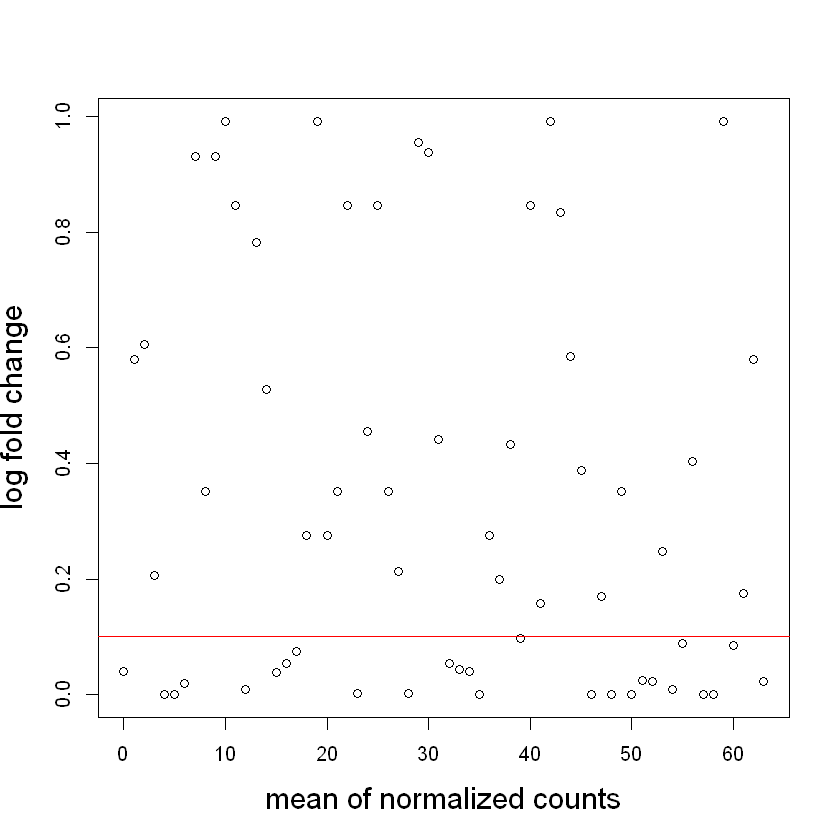

log2 fold change (MLE): COHORT P vs O 
Wald test p-value: COHORT P vs O 
DataFrame with 26 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
35   133.1940       -2.04215  0.317882  -6.42426 1.32512e-10 8.48077e-09
5    159.5815       -1.62150  0.278092  -5.83079 5.51656e-09 1.76530e-07
46    95.8441        1.22842  0.231243   5.31225 1.08282e-07 1.73252e-06
57   148.2410        1.79116  0.336571   5.32178 1.02757e-07 1.73252e-06
4    143.5815        1.90185  0.434979   4.37228 1.22956e-05 1.57384e-04
...       ...            ...       ...       ...         ...         ...
32    114.069       0.839489  0.356672   2.35368   0.0185888   0.0540766
17    119.358      -0.623138  0.281829  -2.21105   0.0270324   0.0752206
60    156.779      -0.643164  0.299616  -2.14663   0.0318229   0.0848612
55    132.816       0.673145  0.318379   2.11429   0.0344905   0.0882956
39    149.278 

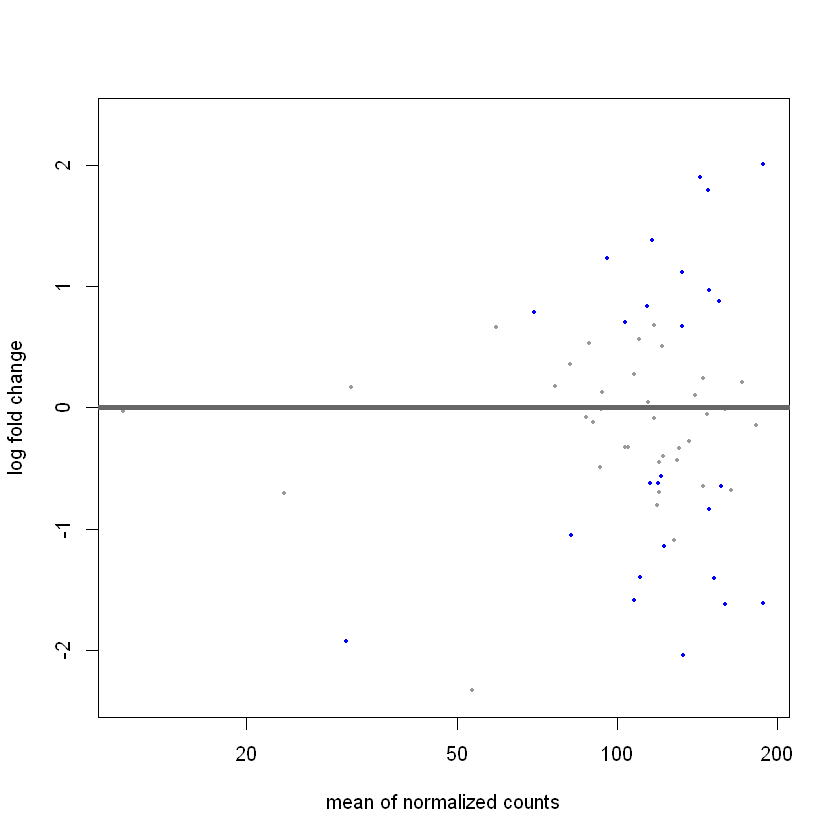

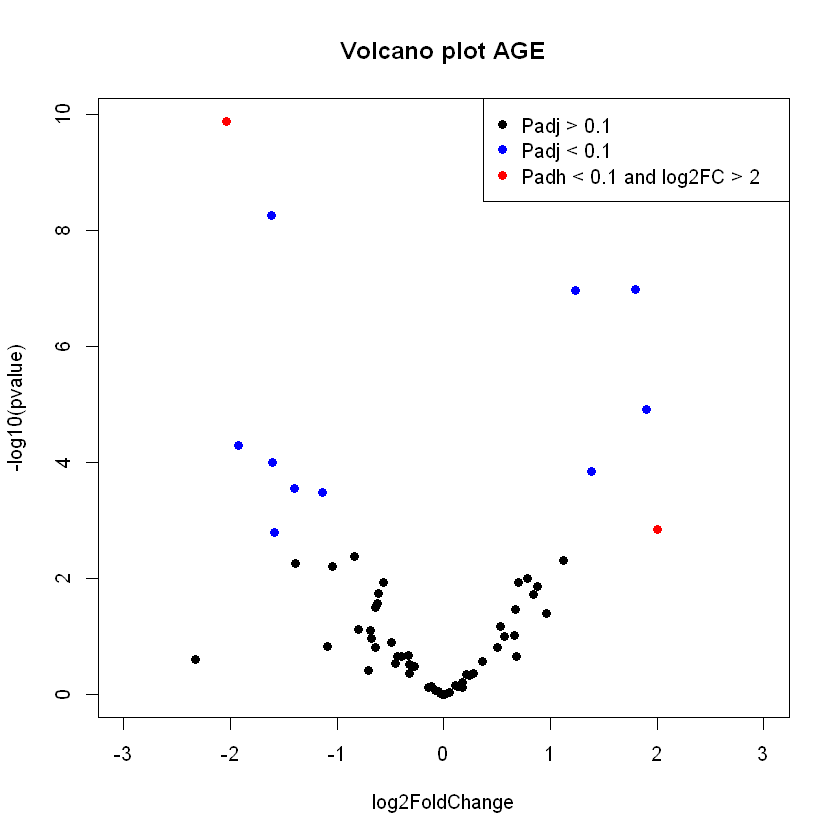

In [21]:
morph_analysis("AGE", ~AGE + TRISCHD + COHORT, FALSE, TRUE)